<a href="https://colab.research.google.com/github/imaadfakier/nobel-laureates-analysis/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [ ]:
df_data.sort_values('year')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


In [ ]:
df_data.sort_values('year', ascending=False)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR
955,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Charles M. Rice,1952-08-25,"Sacramento, CA",United States of America,United States of America,Male,Rockefeller University,"New York, NY",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
df_data.duplicated().any()

False

In [ ]:
# ---

In [ ]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [ ]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [ ]:
df_data.isna().values.any()

True

In [ ]:
# df_data.isna().count()  # see the difference
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
# Why are there so many NaN values for the birth date? And why are there so many 
# missing values among the organisation columns?

# Filtering on the NaN values in the birth date column we see that we get back a 
# bunch of organisations, like the UN or the Red Cross.
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']

df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
# That makes sense. We also see that since the organisation's name is in the 
# full_name column, the organisation_name column contains NaN.

In [ ]:
# In addition, when we look at for rows where the organization_name column has 
# no value, we also see that many prizes went to people who were not affiliated 
# with a university or research institute. This includes many of the Literature 
# and Peace prize winners.
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']

df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
df_data['birth_date']

0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

#### Add a Column with the Prize Share as a Percentage

In [ ]:
df_data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
121,1925,Chemistry,The Nobel Prize in Chemistry 1925,"""for his demonstration of the heterogenous nat...",1/1,Individual,Richard Adolf Zsigmondy,1865-04-01,Vienna,Austrian Empire (Austria),Austria,Male,Goettingen University,Göttingen,Germany,AUT
847,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,Individual,Ellen Johnson Sirleaf,1938-10-29,Monrovia,Liberia,Liberia,Female,NaN,NaN,NaN,LBR
867,2013,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their empirical analysis of asset prices""",1/3,Individual,Lars Peter Hansen,1952-10-26,"Urbana, IL",United States of America,United States of America,Male,University of Chicago,"Chicago, IL",United States of America,USA
358,1964,Physics,The Nobel Prize in Physics 1964,"""for fundamental work in the field of quantum ...",1/4,Individual,Aleksandr Mikhailovich Prokhorov,1916-07-11,Atherton,Australia,Australia,Male,P.N. Lebedev Physical Institute,Moscow,Russia,AUS
894,2015,Medicine,The Nobel Prize in Physiology or Medicine 2015,"""for their discoveries concerning a novel ther...",1/4,Individual,Satoshi Ōmura,1935-07-12,Yamanashi Prefecture,Japan,Japan,Male,Kitasato University,Tokyo,Japan,JPN


In [ ]:
df_data['share_pct'] = df_data['prize_share'].apply(lambda share: int(share.split('/')[0]) / int(share.split('/')[1]))

# Adding a column that contains the percentage share as first requires that we 
# split the string on the forward slash. Then we can convert to a number. And 
# finally, we can do the division.
separated_values = df_data.prize_share.str.split('/', expand=True)
print(separated_values)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator
print('\n')
df_data['share_pct']

     0  1
0    1  1
1    1  1
2    1  1
3    1  2
4    1  2
..  .. ..
957  1  3
958  1  1
959  1  4
960  1  4
961  1  2

[962 rows x 2 columns]




0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Name: share_pct, Length: 962, dtype: float64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Challenge 1: Come up with 3 Questions

A big part of data science is coming up with questions that you'd like to explore. This is the most difficult aspect to teach in a tutorial because it's completely open-ended and requires some creativity. Often times you will be asking questions of the data, that it actually cannot answer - and that's ok. That's all part of the process of discovery.

Pause here for a moment and think about the kind of data you saw in the columns. Write down at least 3 questions that you'd like to explore as part of this analysis. For example, your question might go like: "What percentage of the Nobel laureates were women?" or "How many prizes were given out in each category". Practice coming up with a few of your own questions.

In the upcoming lessons, you might find that we will write the code to answer some of your questions. And if not, your questions make for a great exercise to take this analysis even further.

In [ ]:
df_data.sample(7)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
56,1909,Physics,The Nobel Prize in Physics 1909,"""in recognition of their contributions to the ...",1/2,Individual,Karl Ferdinand Braun,1850-06-06,Fulda,Hesse-Kassel (Germany),Germany,Male,Strasbourg University,Strasbourg,France,DEU,0.50
619,1991,Physics,The Nobel Prize in Physics 1991,"""for discovering that methods developed for st...",1/1,Individual,Pierre-Gilles de Gennes,1932-10-24,Paris,France,France,Male,Collège de France,Paris,France,FRA,1.00
372,1966,Literature,The Nobel Prize in Literature 1966,"""for his profoundly characteristic narrative a...",1/2,Individual,Shmuel Yosef Agnon,1888-07-17,Buczacz (Buchach),Austria-Hungary (Ukraine),Ukraine,Male,NaN,NaN,NaN,UKR,0.50
545,1984,Literature,The Nobel Prize in Literature 1984,"""for his poetry which endowed with freshness, ...",1/1,Individual,Jaroslav Seifert,1901-09-23,Prague,Austria-Hungary (Czech Republic),Czech Republic,Male,NaN,NaN,NaN,CZE,1.00
210,1943,Physics,The Nobel Prize in Physics 1943,"""for his contribution to the development of th...",1/1,Individual,Otto Stern,1888-02-17,Sorau (Zory),Germany (Poland),Poland,Male,Carnegie Mellon University,"Pittsburgh, PA",United States of America,POL,1.00
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Australia,Male,Victoria University,Manchester,United Kingdom,AUS,0.50
149,1929,Peace,The Nobel Peace Prize 1929,NaN,1/1,Individual,Frank Billings Kellogg,1856-12-22,"Potsdam, NY",United States of America,United States of America,Male,NaN,NaN,NaN,USA,1.00


In [ ]:
# 1.

Which countries have the most nobel prize winners?

In [ ]:
# 2.

Does any individual have more than one nobel prize?

In [ ]:
# 3.

Do groups make up majority of the nobel prize winners?

In [ ]:
# The challenges below are all based on questions we're going to ask the data:

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
df_data['sex'].value_counts()

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
fig = px.pie(
    # df_data,  # optional
    labels=df_data['sex'].value_counts().index, 
    # values=df_data['sex'].value_counts(), 
    values=df_data['sex'].value_counts().values,  # <--- learned something new
    # names=df_data.sex.value_counts(), 
    names=df_data['sex'].value_counts().index,  # <--- learned something new
    title='Percentage of Male vs. Female Winners', 
    hole=0.4
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')  # <--- learned something new
fig.show()

# df_data.sex.unique()
# df_data.sex.nunique()

In [ ]:
# ---

In [ ]:
biology = df_data.sex.value_counts()

fig = px.pie(labels=biology.index, 
             values=biology.values,
             title="Percentage of Male vs. Female Winners",
             names=biology.index,
             hole=0.4,)
 
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
# # df_data.sort_values('year')[df_data['sex'] == 'Female']
# df_data.sort_values('year')[df_data.sort_values('year')['sex'] == 'Female']
df_data.sort_values('year')[df_data.sort_values('year')['sex'] == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [ ]:
df_data.sort_values('year')[df_data.sort_values('year')['sex'] == 'Female'].head(3)[['full_name', 'organization_name']]

,full_name,organization_name
18,"Marie Curie, née Sklodowska",NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",NaN
51,Selma Ottilia Lovisa Lagerlöf,NaN


In [ ]:
# ---

In [ ]:
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [ ]:
# df_data[df_data.duplicated(['full_name'])]
# # df_data[df_data.duplicated(['full_name', 'birth_country_current'])]
df_data[df_data.duplicated(subset=['full_name'], keep=False)]  # <--- learned something new

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


In [ ]:
# ---

In [ ]:
# Winning a Nobel prize is quite an achievement. However, some folks have 
# actually won the prize multiple times. To find them, we can use many different 
# approaches. One approach is to look for duplicates in the full_name column:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

# There are 6 winners who were awarded the prize more than once.

There are 6 winners who were awarded the prize more than once.


In [ ]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

# Only 4 of the repeat laureates were individuals.

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


In [ ]:
# We see that Marie Curie actually got the Nobel prize twice - once in physics 
# and once in chemistry. Linus Carl Pauling got it first in chemistry and later 
# for peace given his work in promoting nuclear disarmament. Also, the 
# International Red Cross was awarded the Peace prize a total of 3 times. The 
# first two times were both during the devastating World Wars.

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [ ]:
df_data['category'].value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [ ]:
fig = px.bar(
    # df_data,  # optional
    title='Number of Prizes Awarded per Category', 
    # x='', 
    # x=df_data['category'].unique(), 
    x = df_data['category'].value_counts().index, 
    # y=df_data.category.value_counts(), 
    y = df_data.category.value_counts().values, 
    # color='Aggryn1'
    color = df_data['category'].value_counts().values,
    color_continuous_scale='Aggrnyl', 
)
fig.update_layout(
    xaxis_title='Nobel Prize Category', 
    coloraxis_showscale=False,  # <--- learned something new
    yaxis_title='Number of Prizes'
)
fig.show()

In [ ]:
# ---

In [ ]:
# To find the number of unique categories in a column we can use:
df_data.category.nunique()

6

In [ ]:
# To generate the vertical plotly bar chart, we again use .value_counts():
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_data[df_data['category'] == 'Economics'].sort_values('year')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.33
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50


In [ ]:
df_data[df_data['category'] == 'Economics'].sort_values('year').loc[393]

year                                                                  1969
category                                                         Economics
prize                    The Sveriges Riksbank Prize in Economic Scienc...
motivation               "for having developed and applied dynamic mode...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                    Jan Tinbergen
birth_date                                             1903-04-12 00:00:00
birth_city                                                       the Hague
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                      The Netherlands School of Economics
organization_city        

In [ ]:
# ---

In [ ]:
# The chart above begs the question: "Why are there so few prizes in the field 
# of economics?". Looking at the first couple of winners in the economics 
# category, we have our answer:
df_data[df_data['category'] == 'Economics'].sort_values('year')[:3:]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


In [ ]:
# The economics prize is much newer. It was first awarded in 1969, compared to 
# 1901 for physics.

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [ ]:
# fig = px.bar(
#     df_data, 
#     # x='', 
#     x=df_data['category'].unique(), 
#     y=df_data.category.value_counts(), 
#     # color='sex'
# )
# fig.show()

# .
# .
# .

# you got this question wrong - it's okay :)

In [ ]:
# How many prizes went to women in Literature compared to Physics?
# ...

In [ ]:
# ---

In [ ]:
# We already saw that overall, only 6.2% of Nobel prize winners were female. 
# Does this vary by category?

# We can combine .groupby() and .agg() with the .count() function. This way we 
# can count the number of men and women by prize category.
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women

,category,sex,prize
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16
5,Literature,Male,101
6,Medicine,Female,12
7,Medicine,Male,210
8,Peace,Female,17
9,Peace,Male,90


In [ ]:
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:
# We can then use .color the parameter in the .bar() function to mark the number 
# of men and women on the chart:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women',)
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

In [ ]:
# We see that overall the imbalance is pretty large with physics, economics, and 
# chemistry. Women are somewhat more represented in categories of Medicine, 
# Literature and Peace. Splitting bar charts like this is an incredibly powerful 
# way to show a more granular picture.

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [ ]:
df_data.groupby('year').count()

,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
year,,,,,,,,,,,,,,,,
1901,6,6,4,6,6,6,6,6,6,6,6,3,3,3,6,6
1902,7,7,5,7,7,7,7,7,7,7,7,4,4,4,7,7
1903,7,7,6,7,7,7,7,7,7,7,7,4,4,4,7,7
1904,6,6,5,6,6,6,5,5,5,5,5,3,3,3,5,6
1905,5,5,4,5,5,5,5,5,5,5,5,3,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,11,11,11,11,11,11,11,11,11,11,11,9,9,9,11,11
2017,12,12,12,12,12,12,11,11,11,11,11,10,7,7,11,12
2018,13,13,13,13,13,13,13,13,13,13,13,10,10,10,13,13


In [ ]:
df_data['year'].value_counts()
# df_data.year.value_counts()

2001    15
2019    14
1996    13
2011    13
2005    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: year, Length: 117, dtype: int64

In [ ]:
# df_data['year'].value_counts()
# df_data.year.value_counts().sort_index()
prizes_per_year = df_data['year'].value_counts().sort_index(ascending=False)
# prizes_per_year = df_data['year'].value_counts().sort_index()
prizes_per_year

2020    12
2019    14
2018    13
2017    12
2016    11
        ..
1905     5
1904     6
1903     7
1902     7
1901     6
Name: year, Length: 117, dtype: int64

In [ ]:
five_year_rolling_average = prizes_per_year.rolling(window=5).mean()

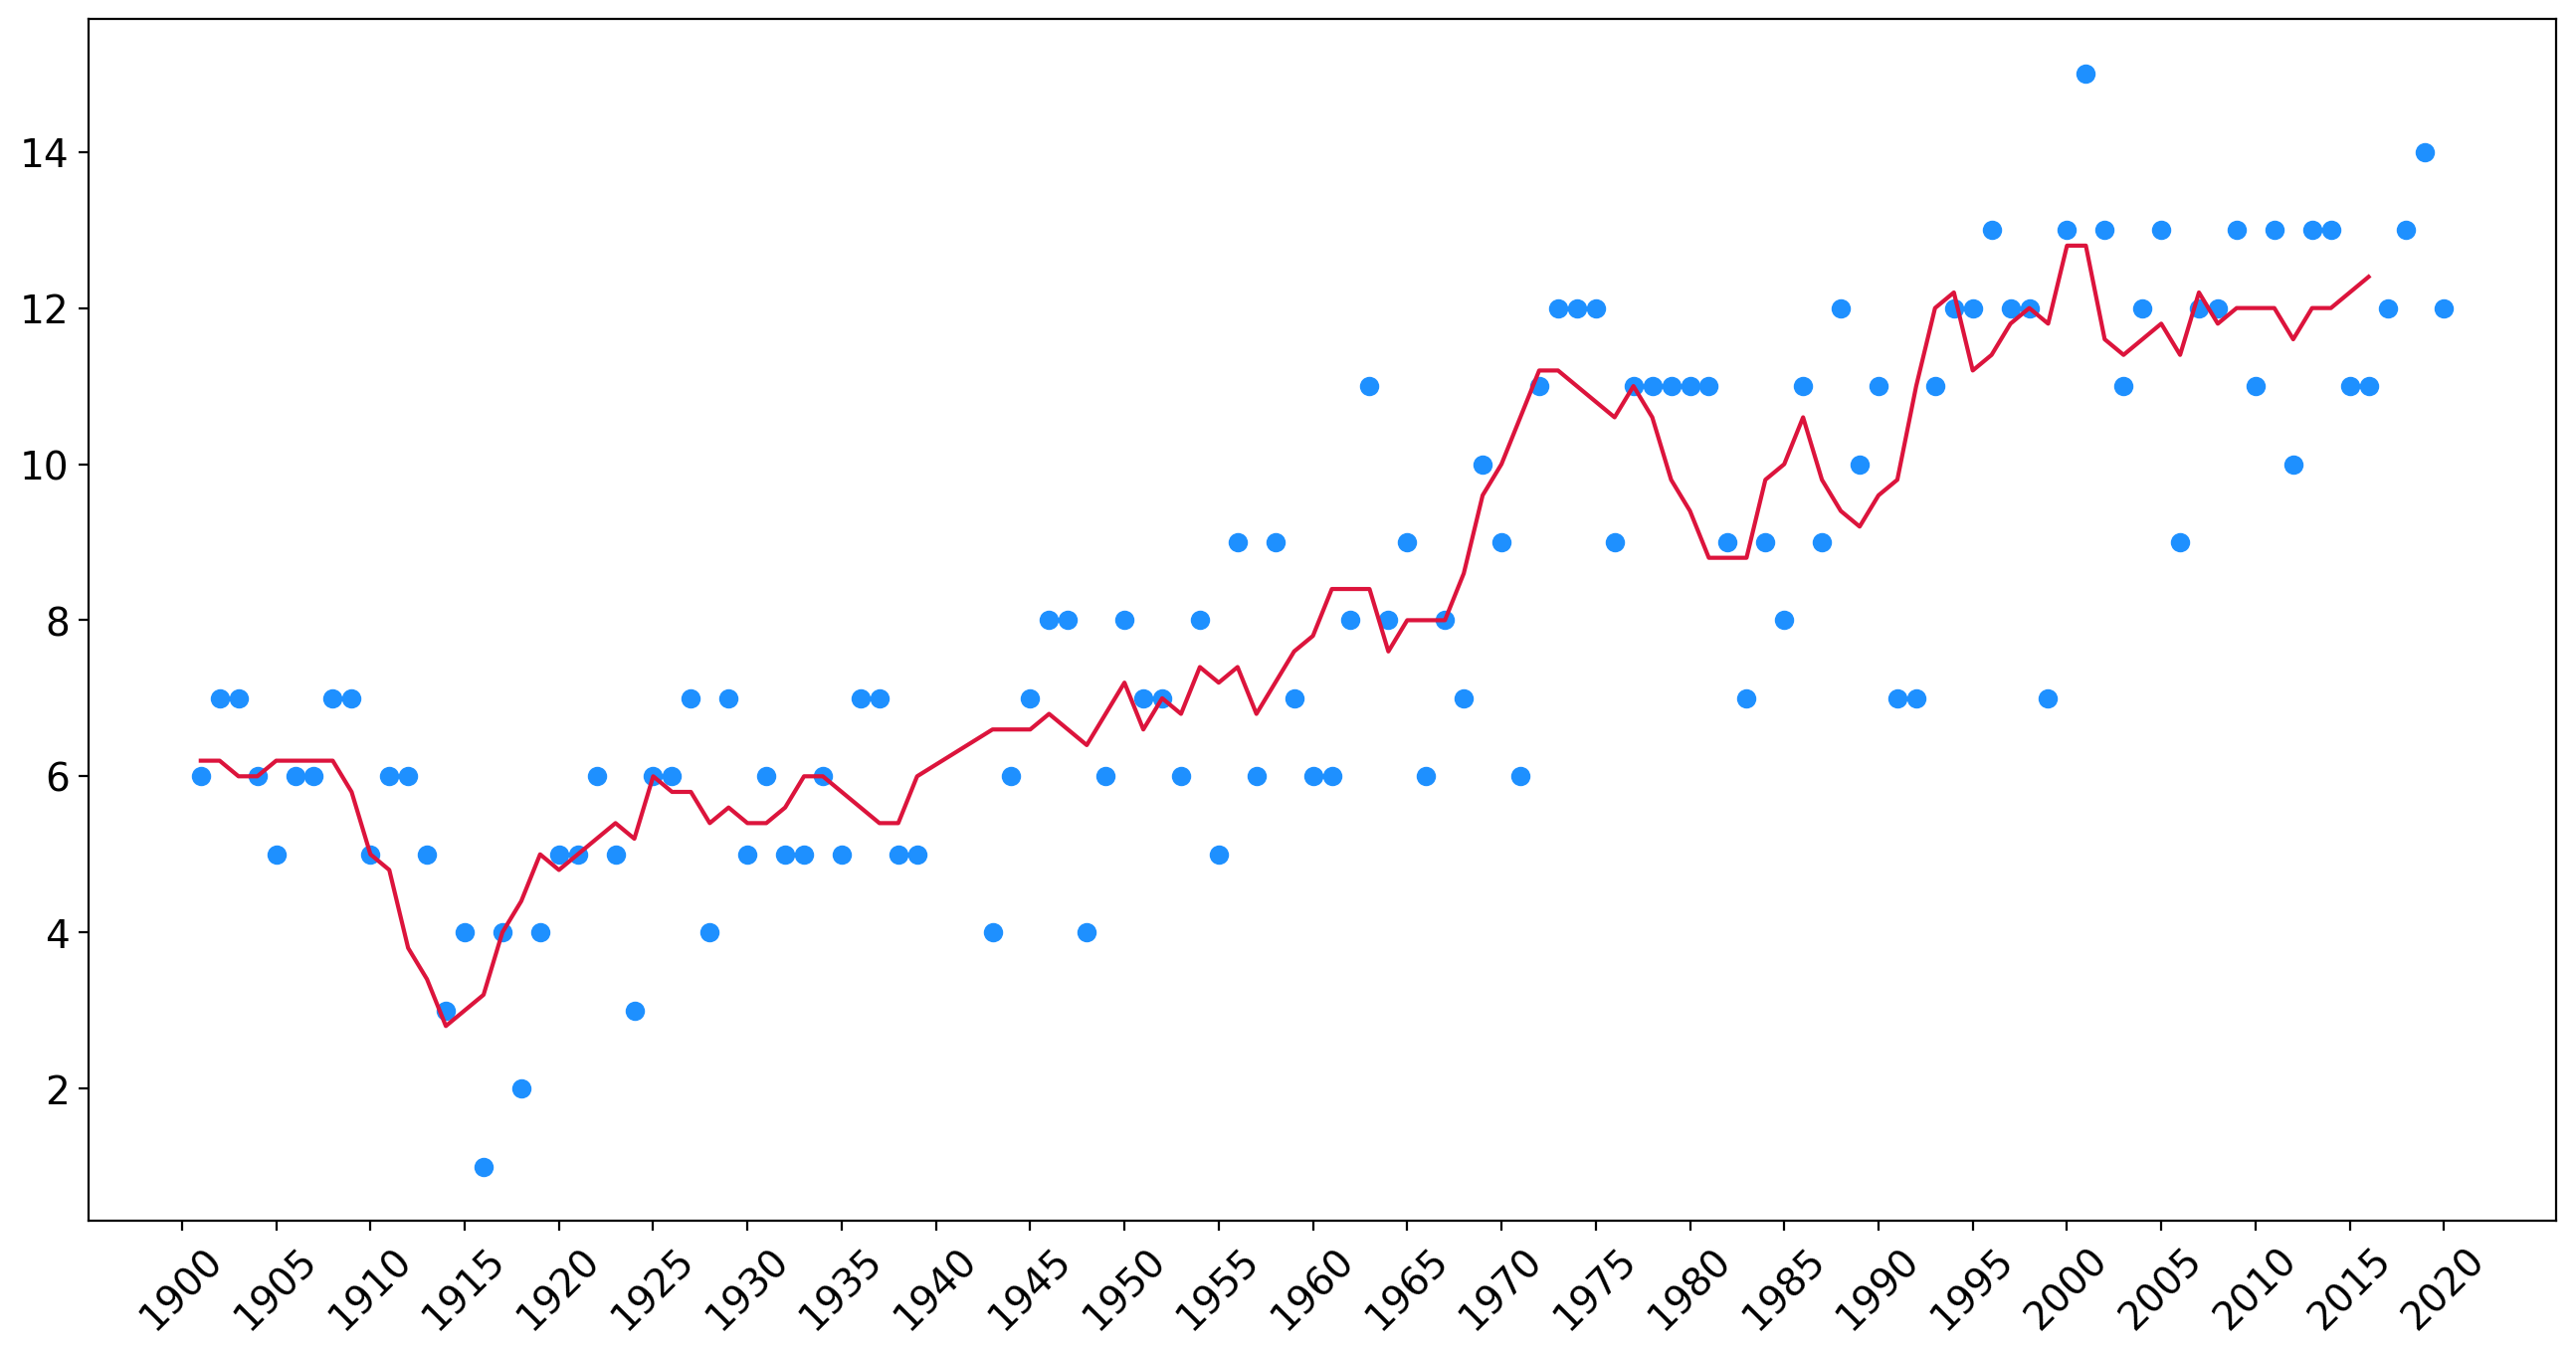

In [ ]:
plt.figure(figsize=(16, 8), dpi=200)

plt.scatter(
    x=prizes_per_year.index, 
    y=prizes_per_year.values, 
    color='dodgerblue'
)

plt.xticks(
    ticks=np.arange(1900, 2021, step=5),  # <--- learned something new
    fontsize=14, 
    rotation=45
)
plt.yticks(fontsize=14)

# plt.plot(
#     five_year_rolling_average, 
#     color='crimson'
# )
plt.plot(
    five_year_rolling_average.index, 
    five_year_rolling_average.values, 
    color='crimson'
)

plt.show()

In [ ]:
# ---

In [ ]:
# First, we have to count the number of Nobel prizes that are awarded each year.
prize_per_year = df_data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [ ]:
# This just involves grouping the data so that we can count the number of 
# entries per year. To calculate the 5-year moving average we use .rolling() and 
# .mean() like we did with the Google Trend data.
moving_average = prize_per_year.rolling(window=5).mean()
moving_average

year
1901     nan
1902     nan
1903     nan
1904     nan
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

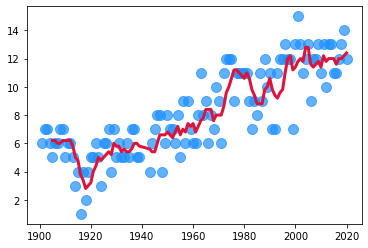

In [ ]:
# Now we can create a Matplotlib chart that superimposes the two:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

In [ ]:
# With the help of a little styling, this chart could look better. To create 
# 5-year tick marks on the x-axis, we generate an array using NumPy:
np.arange(1900, 2021, step=5)

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

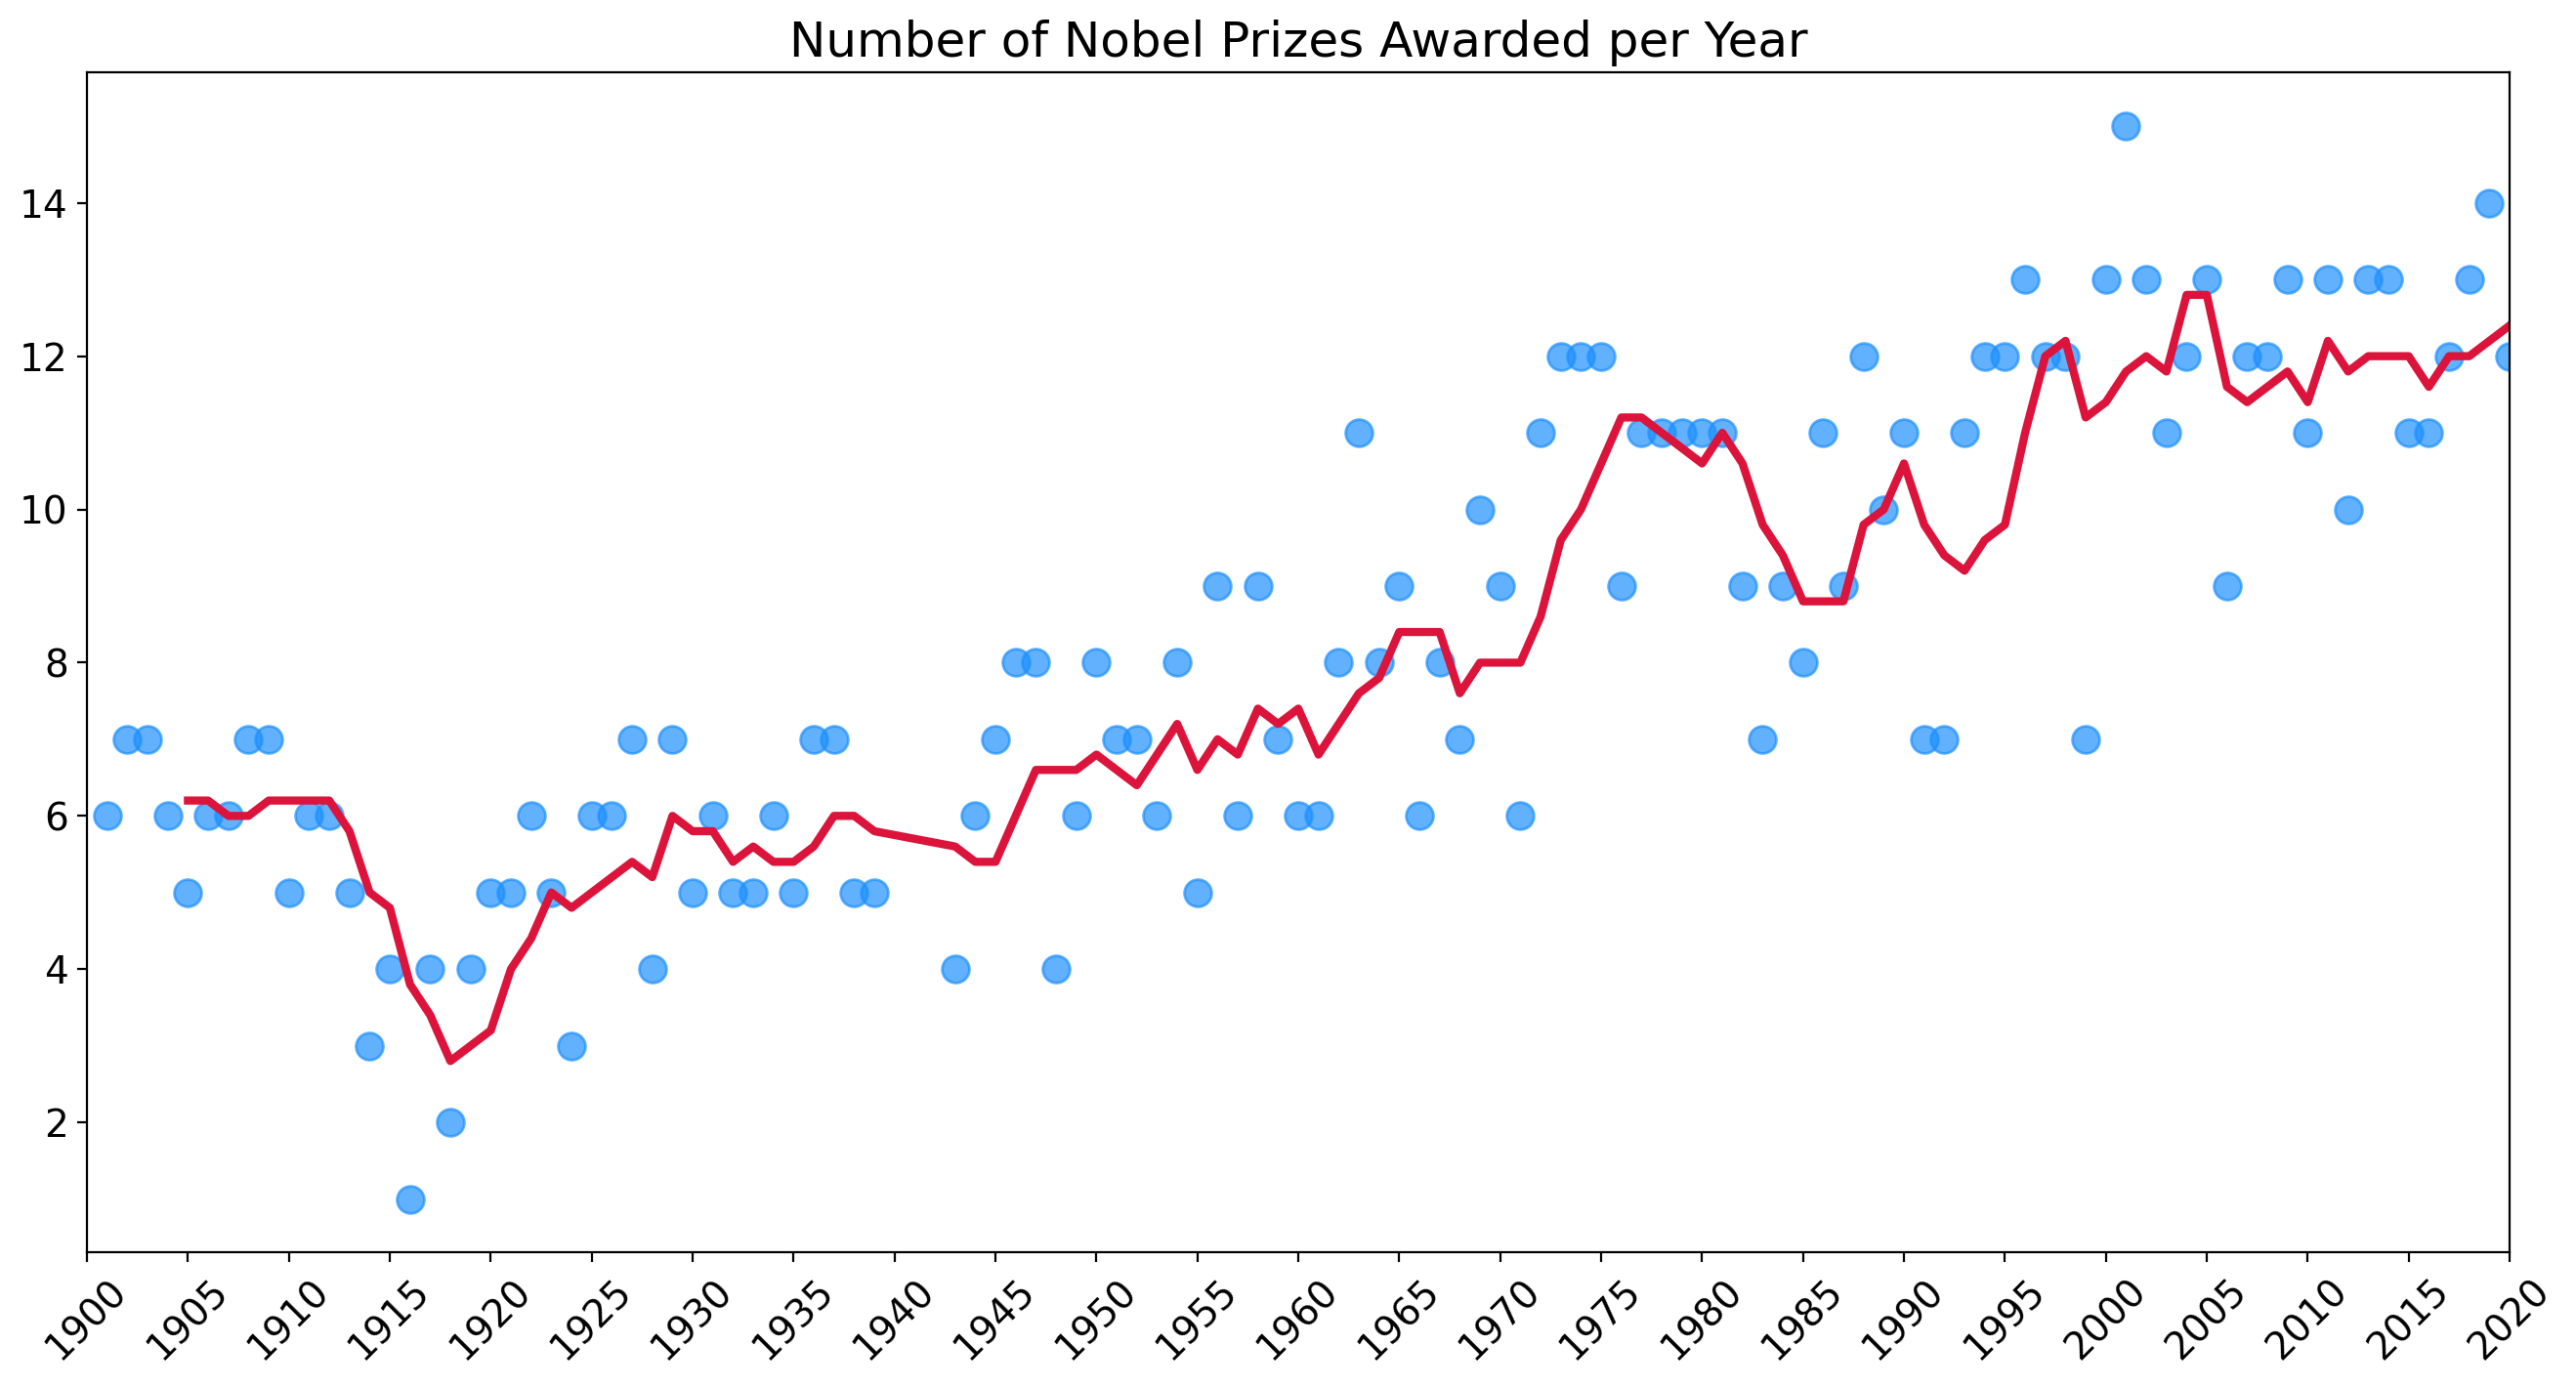

In [ ]:
# Then we tap into functions like the .figure(), the .title(), the .xticks(), 
# and .yticks() to fine-tune the chart.

# In addition, we will shortly be adding a second y-axis, so we can use an Axes 
# object to draw our scatter and line plots.
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [ ]:
prize_share_per_year = df_data.groupby('year').mean()
prize_share_per_year

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [ ]:
prize_share_five_year_average = prize_share_per_year.rolling(window=5).mean()
prize_share_five_year_average

,share_pct
year,
1901,nan
1902,nan
1903,nan
1904,nan
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


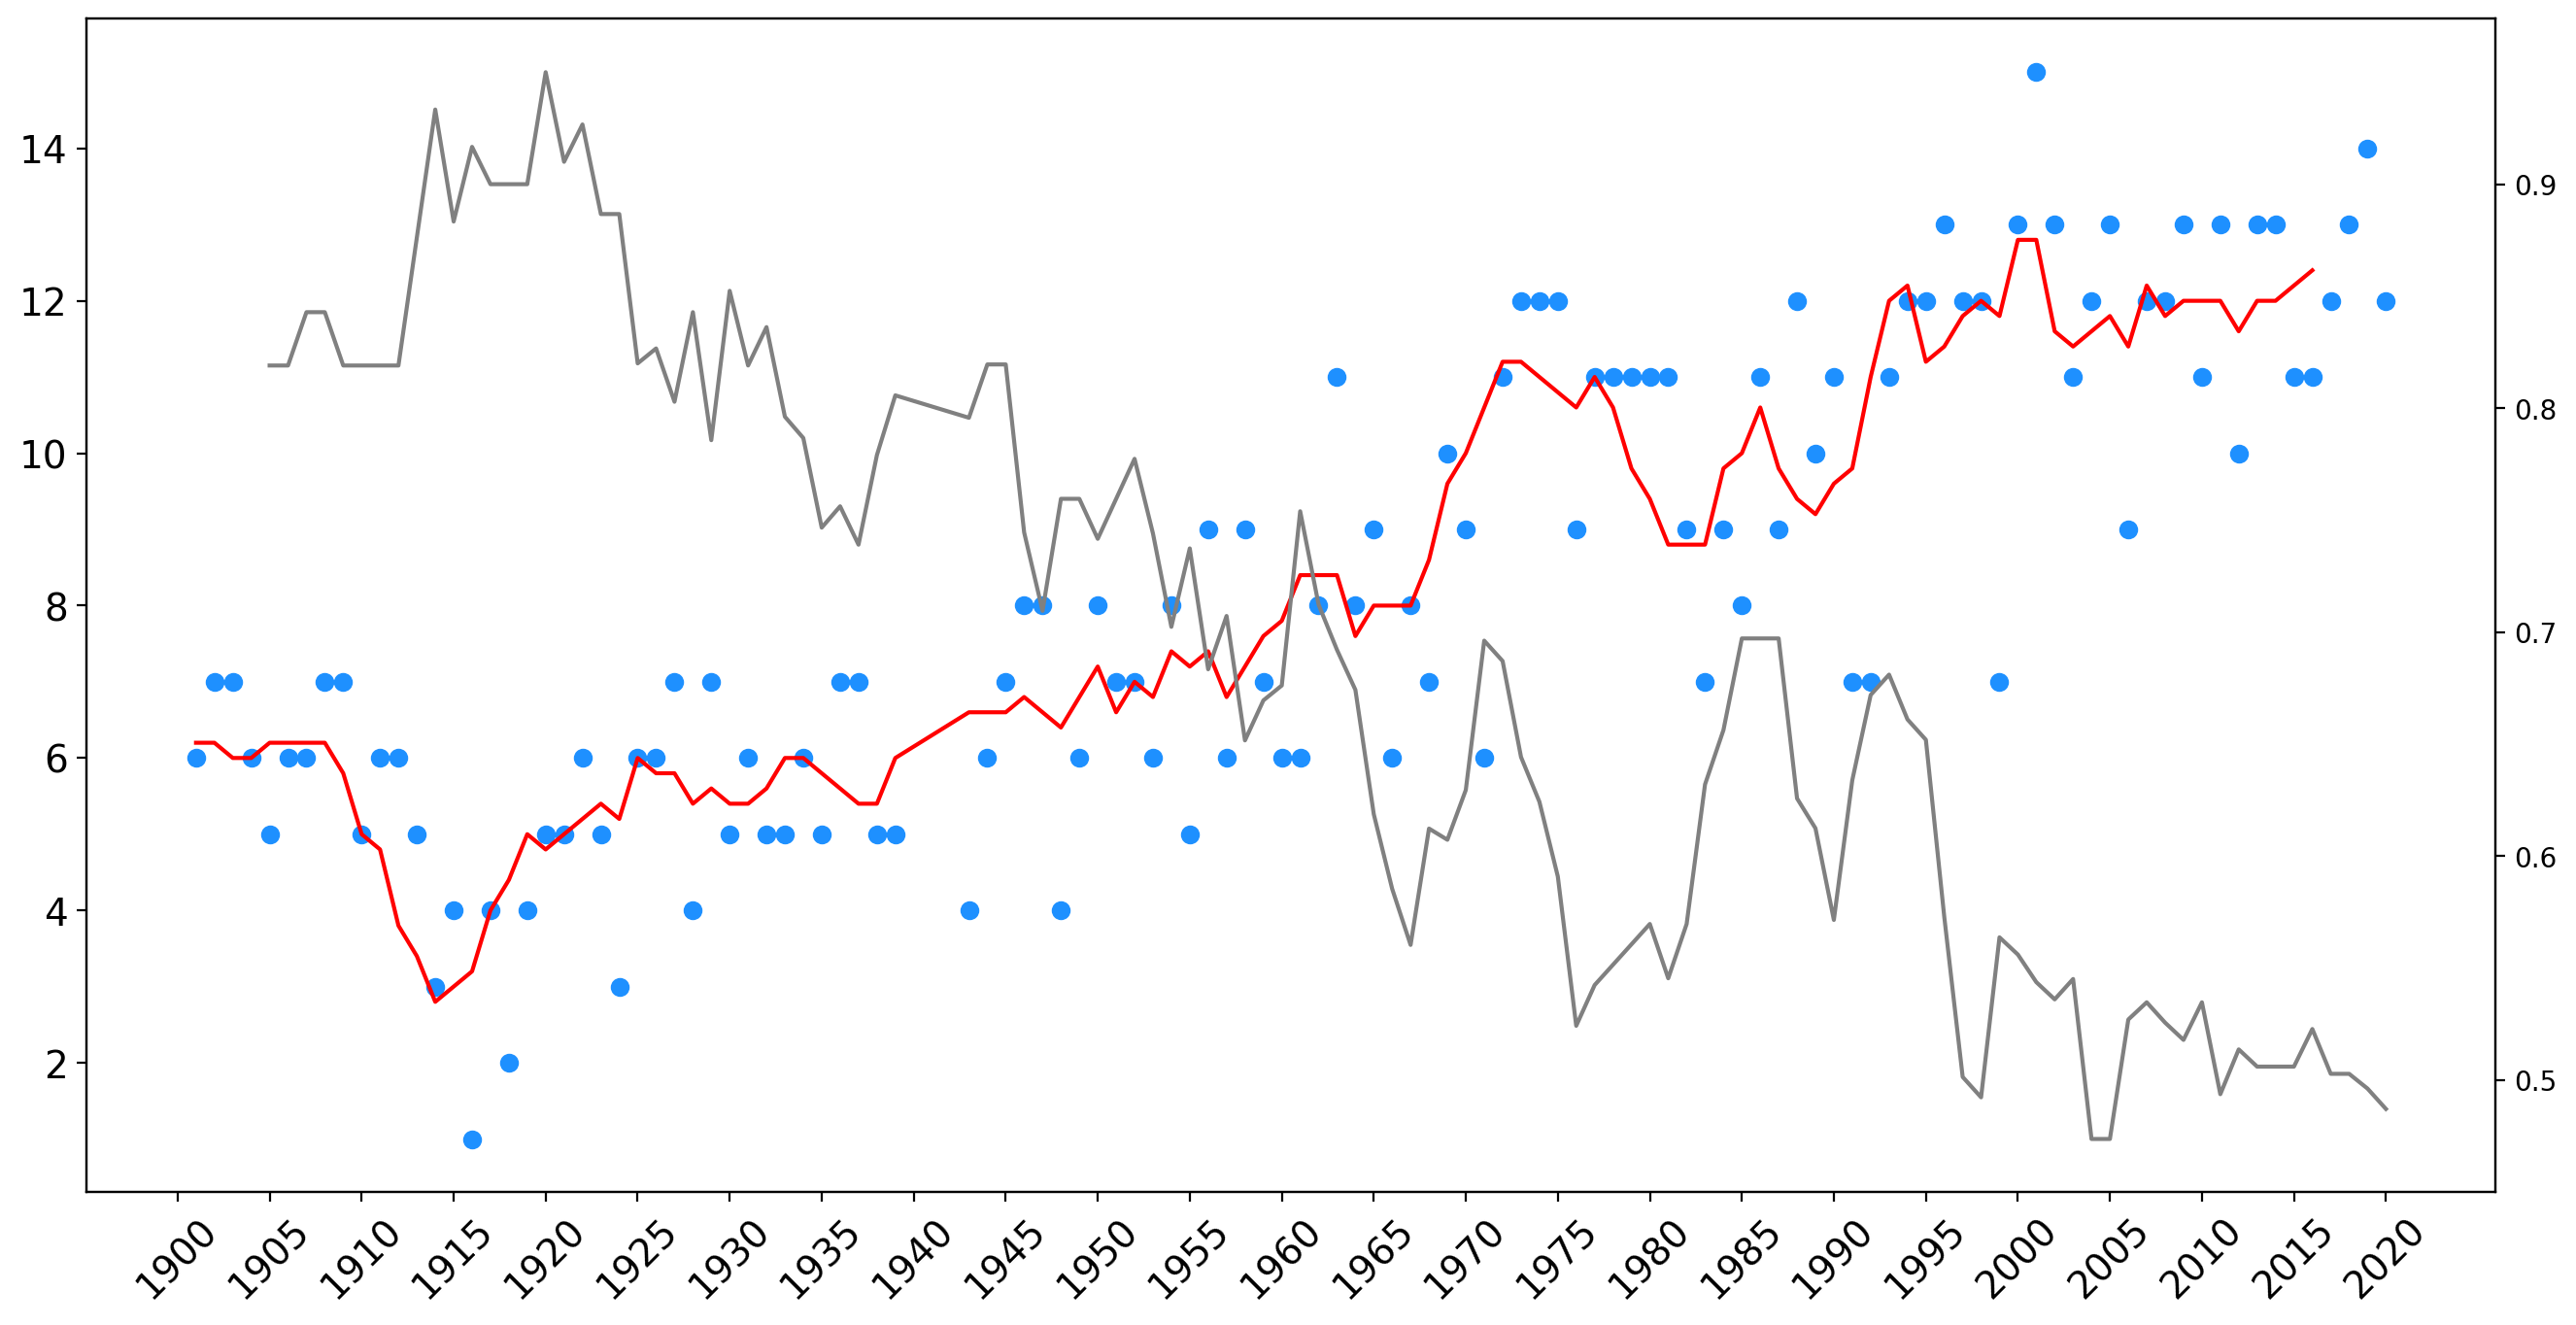

In [ ]:
plt.figure(figsize=(16, 8), dpi=200)

plt.xticks(
    ticks=np.arange(1900, 2021, step=5), 
    fontsize=14, 
    rotation=45
)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.scatter(
    # x=prize_share_per_year.index,  # wrong!
    # y=prize_share_per_year.values,  # wrong!
    x=prizes_per_year.index, 
    y=prizes_per_year.values, 
    color='dodgerblue'
)

ax1.plot(
    # prize_share_five_year_average,  # wrong!
    five_year_rolling_average.index, 
    five_year_rolling_average.values, 
    color='red'
)

ax2.plot(
    # prize_share_five_year_average,  # won't work in this case
    prize_share_per_year.index,  # <--- learned something new
    # prizes_per_year.index,  # <--- learned something new
    prize_share_five_year_average.values, 
    color='gray'
    # color='grey'
)

plt.show()

In [ ]:
# *See if you can invert the secondary y-axis to make the relationship even more 
# clear.

# Got this wrong, but it's okay ;)

In [ ]:
# ---

In [ ]:
# Now we can work out the rolling average of the percentage share of the prize. 
# If more prizes are given out, perhaps it is because the prize is split between 
# more people.
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
yearly_avg_share

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [ ]:
share_moving_average = yearly_avg_share.rolling(window=5).mean()
share_moving_average

,share_pct
year,
1901,nan
1902,nan
1903,nan
1904,nan
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


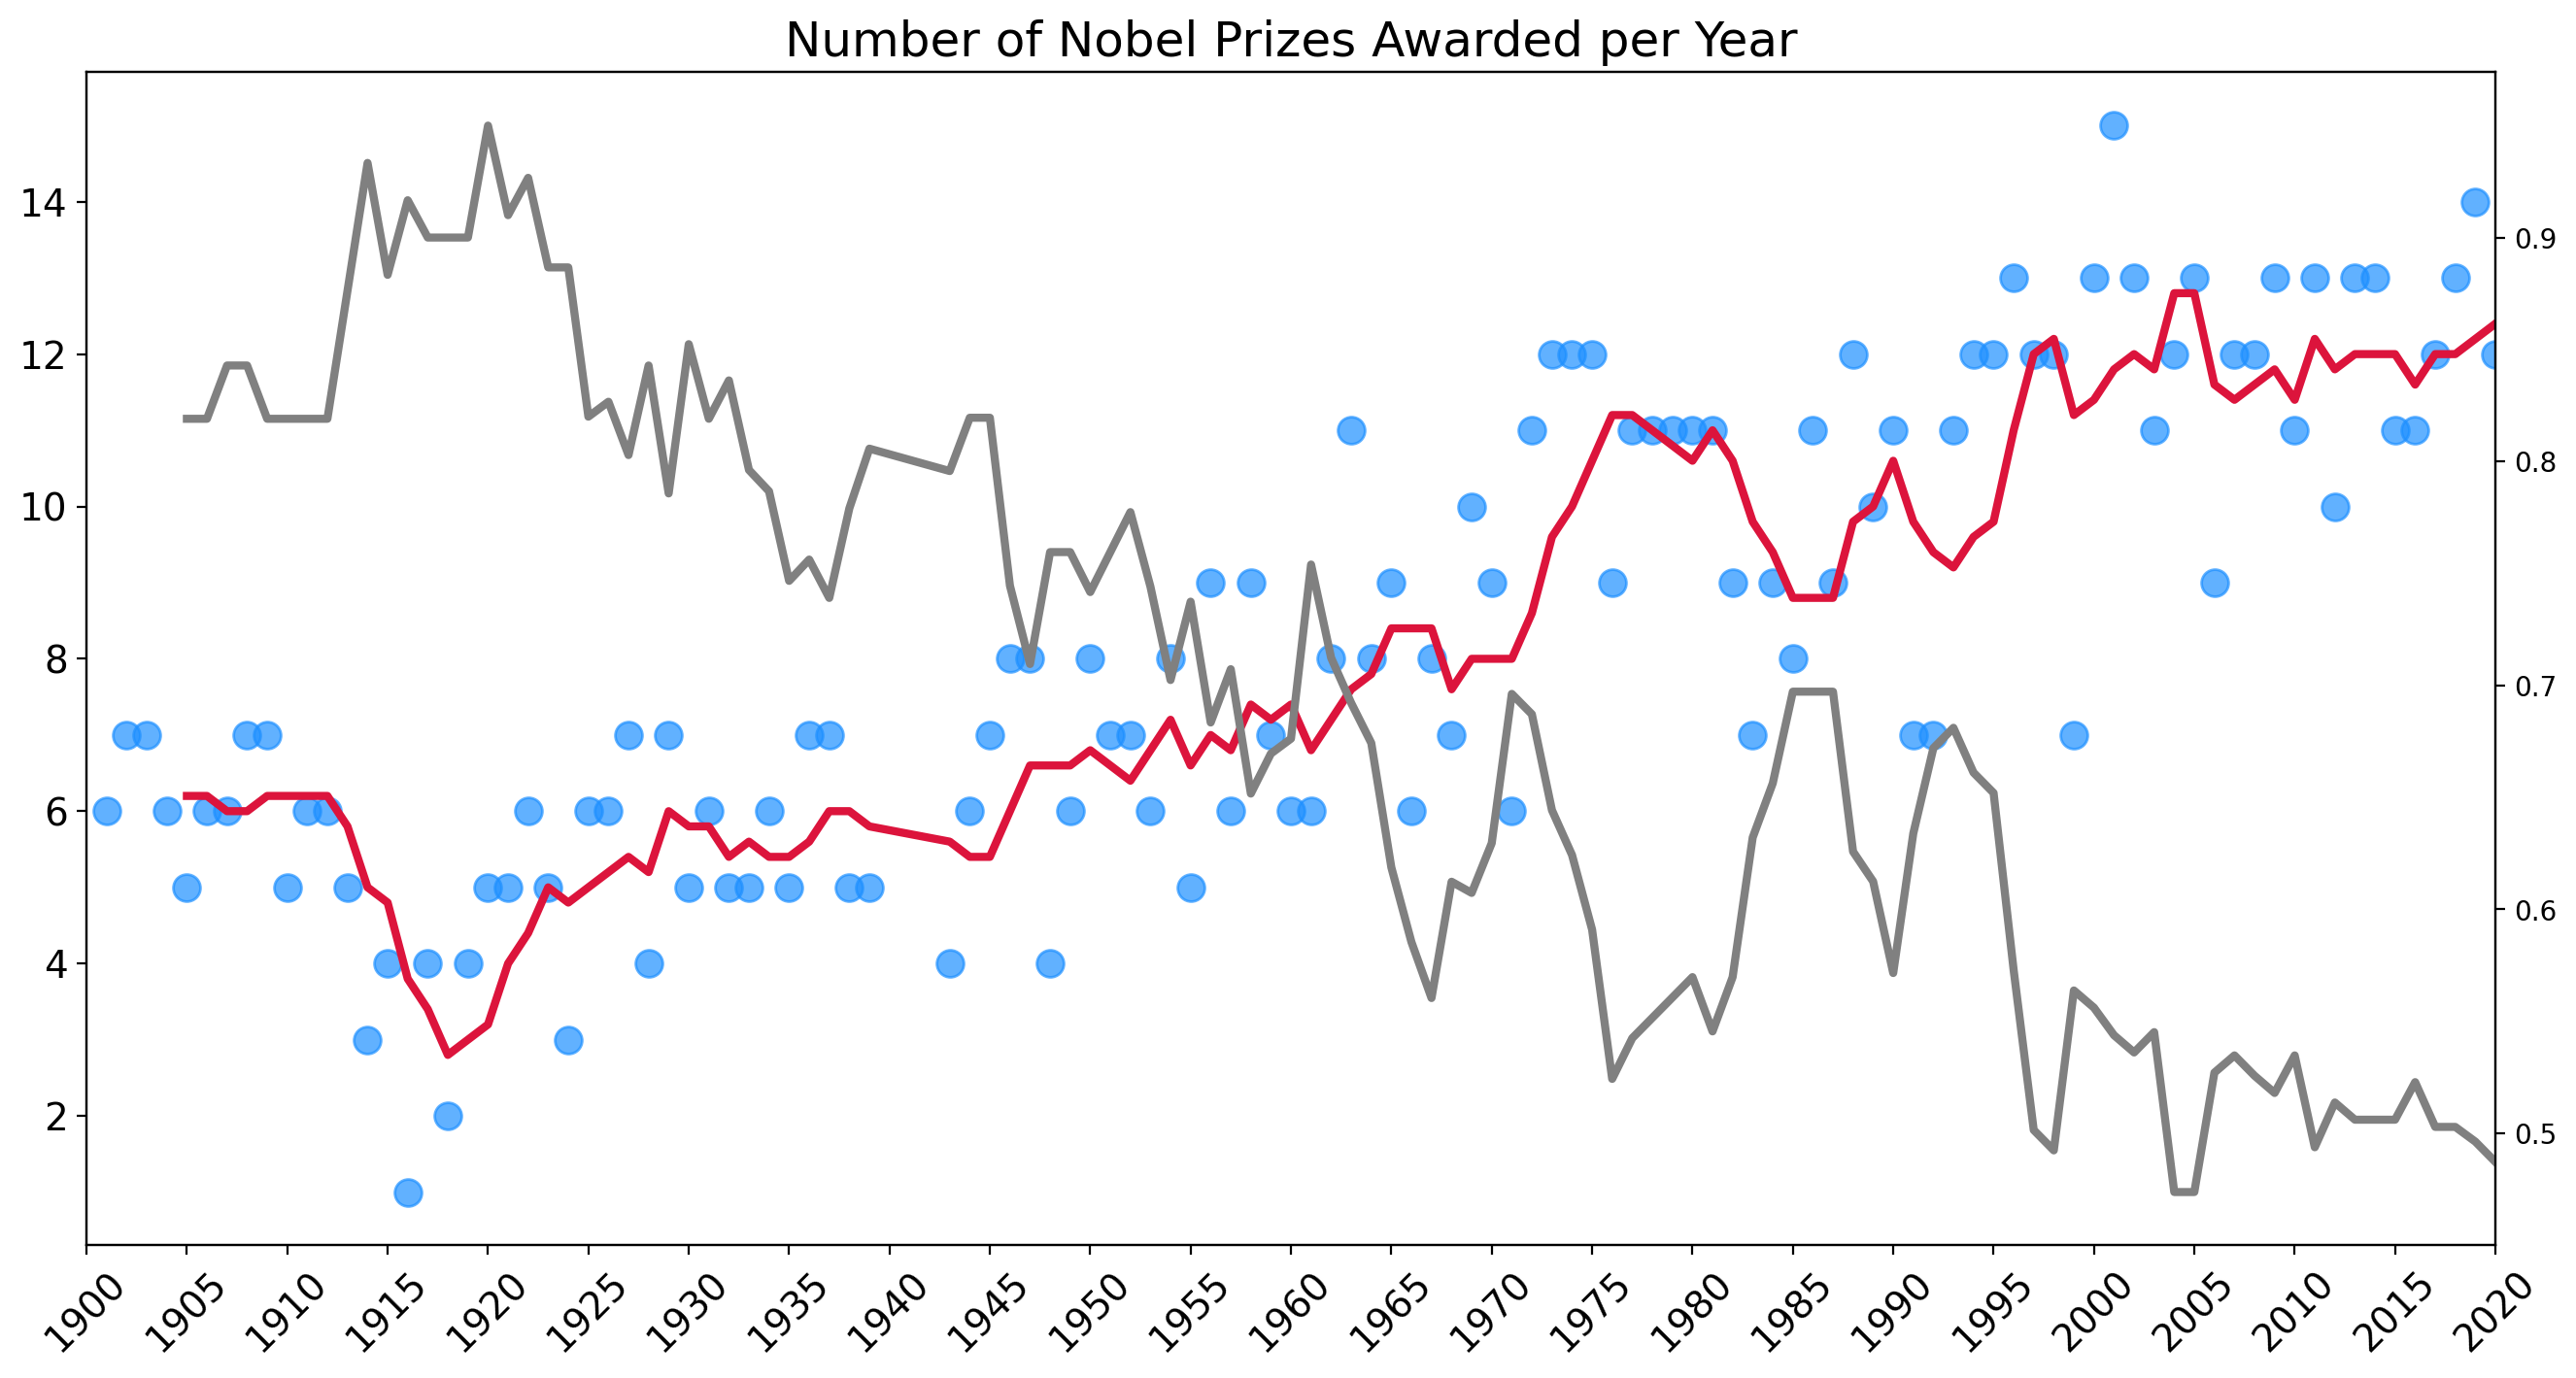

In [ ]:
# If more people get the prize, then the average share should go down, right?
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

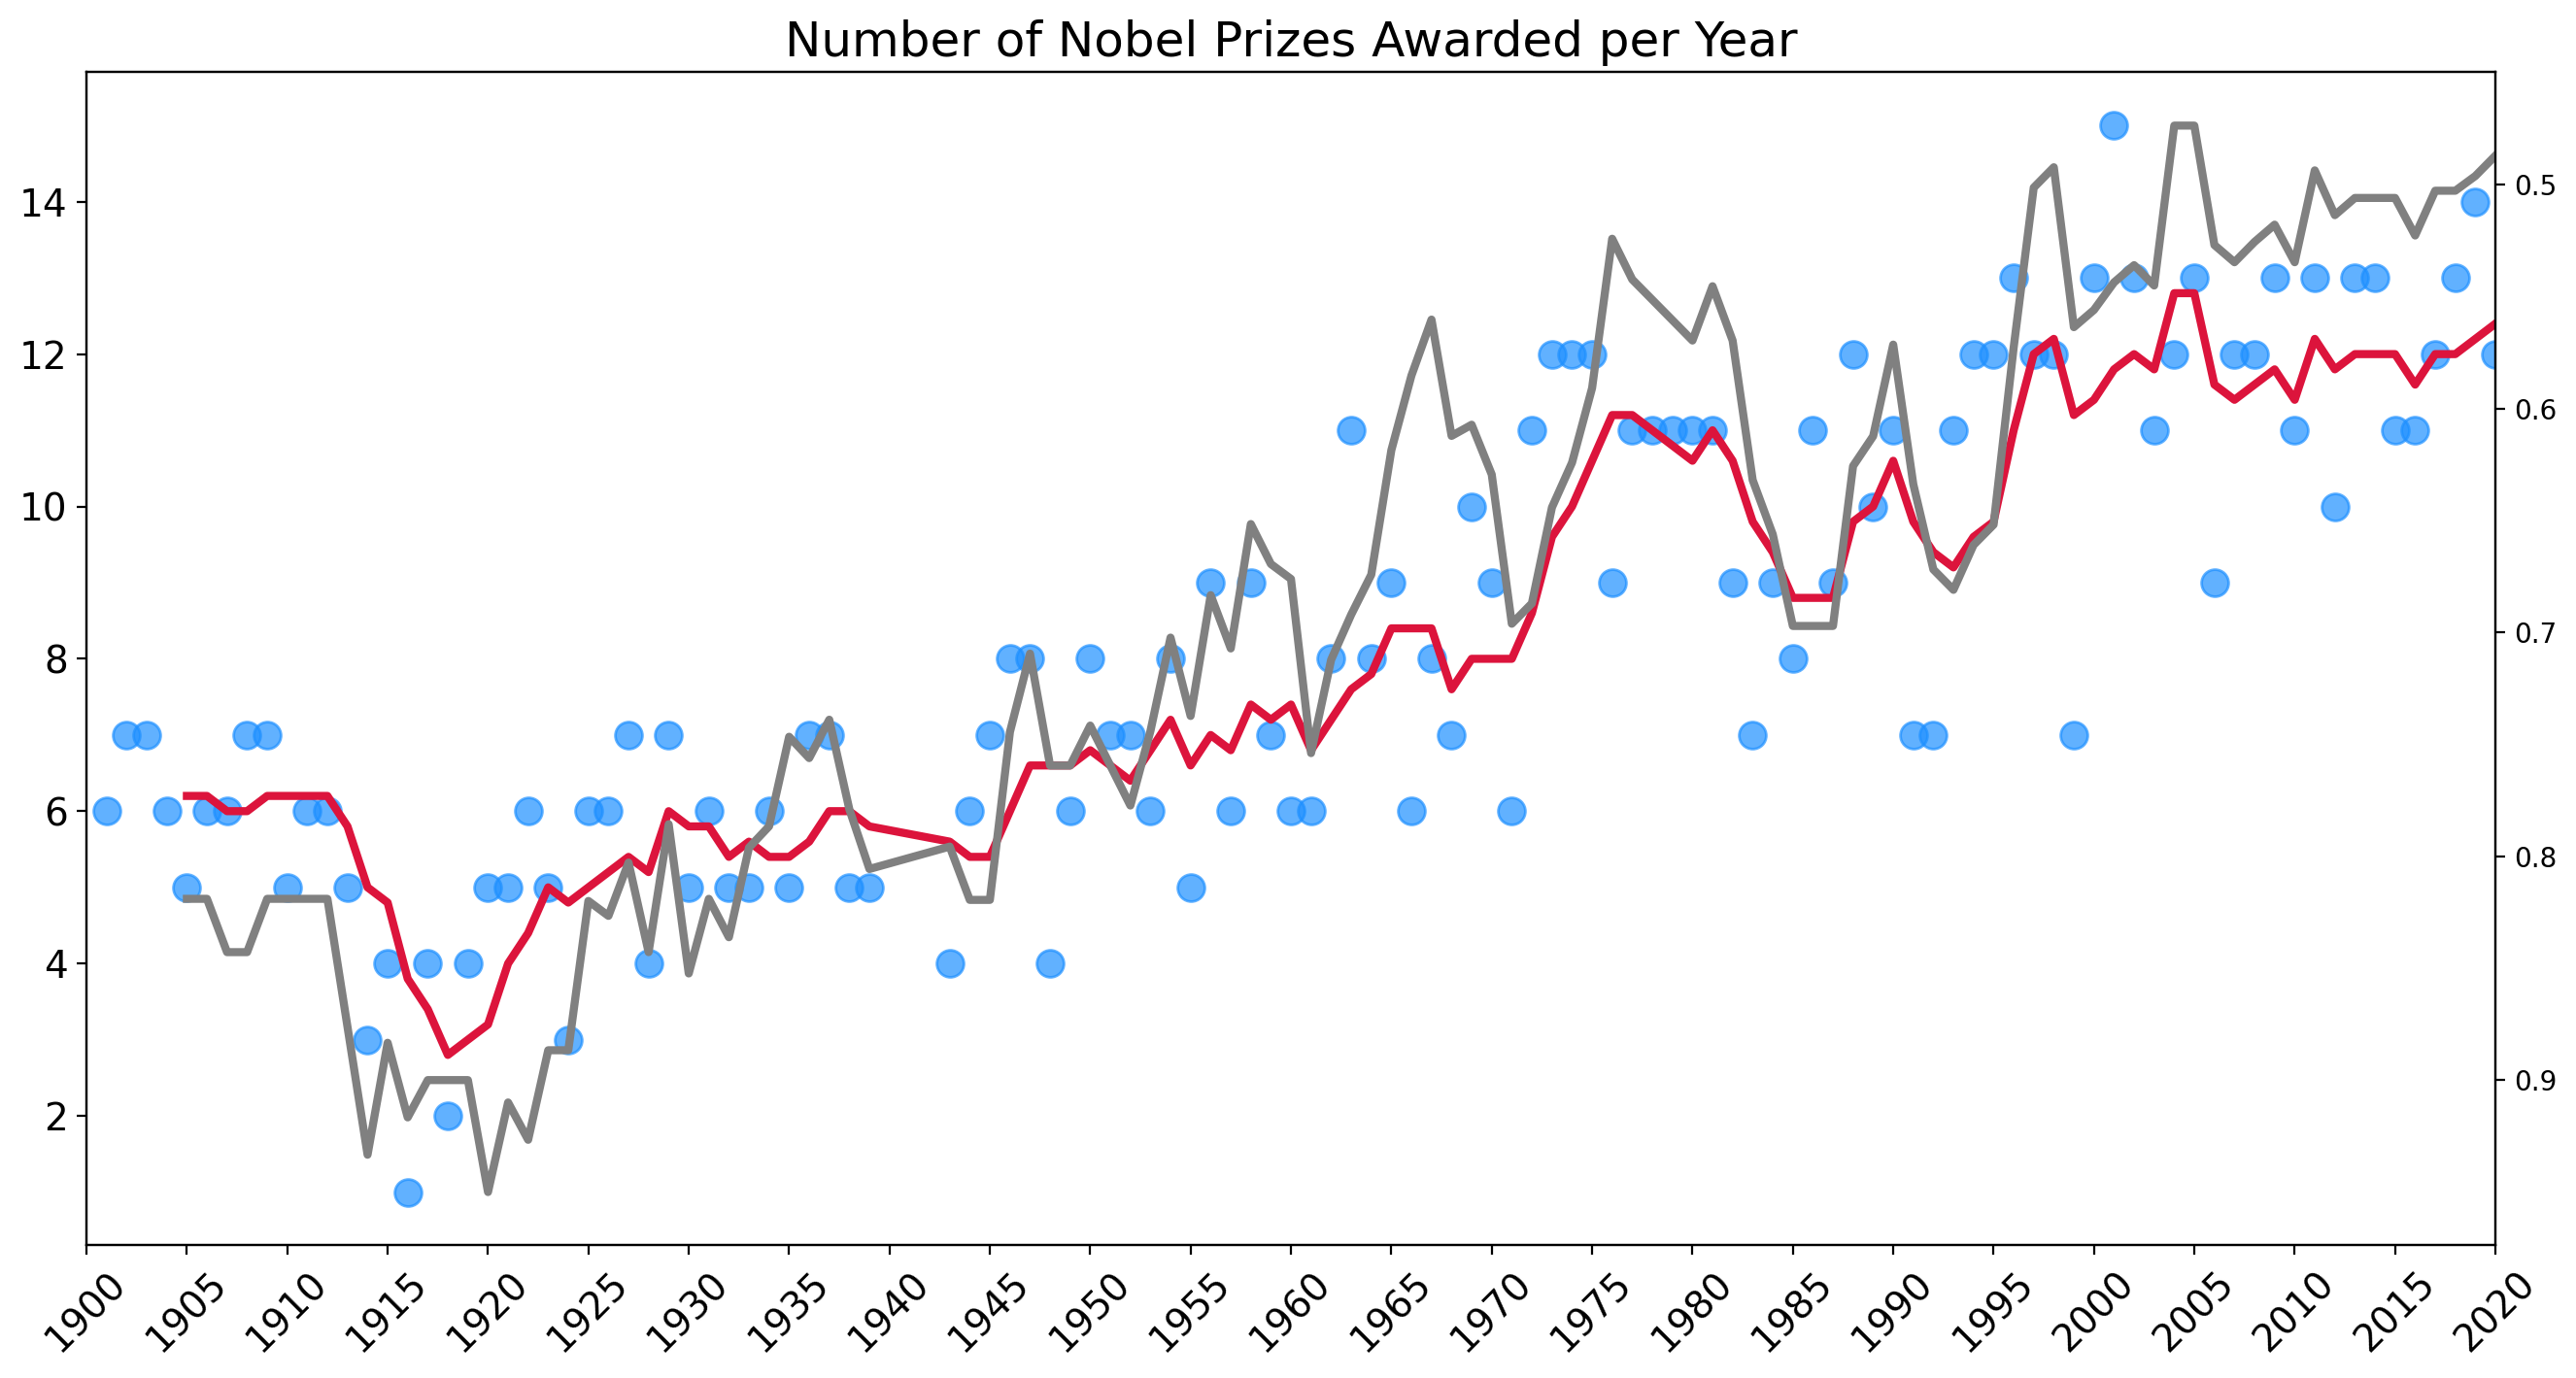

In [ ]:
# To see the relationship between the number of prizes and the laureate share 
# even more clearly we can invert the second y-axis.
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# -----------------------------------------------------------------------------
# Can invert axis
ax2.invert_yaxis()  # the key to it all :)
# -----------------------------------------------------------------------------

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

In [ ]:
# What do we see on the chart? Well, there is clearly an upward trend in the 
# number of prizes being given out as more and more prizes are shared. Also, 
# more prizes are being awarded from 1969 onwards because of the addition of the 
# economics category. We also see that very few prizes were awarded during the 
# first and second world wars. Note that instead of there being a zero entry for 
# those years, we instead see the effect of the wards as missing blue dots.

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
top20_countries = df_data[['birth_country_current', 'prize']]
top20_countries

,birth_country_current,prize
0,Netherlands,The Nobel Prize in Chemistry 1901
1,France,The Nobel Prize in Literature 1901
2,Poland,The Nobel Prize in Physiology or Medicine 1901
3,France,The Nobel Peace Prize 1901
4,Switzerland,The Nobel Peace Prize 1901
...,...,...
957,United Kingdom,The Nobel Prize in Physiology or Medicine 2020
958,NaN,The Nobel Peace Prize 2020
959,United States of America,The Nobel Prize in Physics 2020
960,Germany,The Nobel Prize in Physics 2020


In [ ]:
# top20_countries = df_data[['birth_country_current', 'prize']].groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count})
top20_countries = df_data[['birth_country_current', 'prize']].groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20:]
top20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [ ]:
bar_chart = px.bar(
    title='Top 20 Countries by Number of Prizes', 
    # x=top20_countries.prize[::-1], 
    x=top20_countries.prize[::], 
    # y=top20_countries['birth_country_current'][::-1], 
    y=top20_countries['birth_country_current'][::], 
    # color=top20_countries.prize.values[::-1], 
    color=top20_countries.prize.values[::], 
    # color_continuous_scale='Aggrynl', 
    color_continuous_scale='Viridis',   
    orientation='h'
)

bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Country', 
    coloraxis_showscale=False,
)

bar_chart.show()

In [ ]:
# ---

In [ ]:
# Looking at our DataFrame there are actually 3 different columns to choose from 
# for creating this ranking: birth_country, birth_country_current or 
# organization_country. However, they each have certain problems and 
# limitations.

# If you look at the entries in the birth country, you'll see that some 
# countries no longer exist! These include the Soviet Union or Czechoslovakia 
# for example. Hence, using birth_country_current is better, since it has the 
# country name which controls the city where the laureate was born. Now, notice 
# that this does not determine the laureates' nationality since some 
# globetrotting folks gave birth to their future Nobel laureate children while 
# abroad. Also, people's nationalities can change as they emigrate and acquire 
# different citizenship or get married and change citizenship. What this boils 
# down to is that we will have to be clear about the assumptions that we will 
# make in the upcoming analysis.

# We can create the list of the top 20 countries like this:
top_countries = df_data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [ ]:
# Note that the ranking here determines how our bar chart will be displayed.
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

In [ ]:
# The United States has a massive number of prizes by this measure. The UK and 
# Germany are in second and third place respectively.

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [ ]:
df_data.sample(11)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
272,1953,Chemistry,The Nobel Prize in Chemistry 1953,"""for his discoveries in the field of macromole...",1/1,Individual,Hermann Staudinger,1881-03-23,Worms,Germany,Germany,Male,University of Freiburg,Breisgau,Germany,DEU,1.00
516,1981,Chemistry,The Nobel Prize in Chemistry 1981,"""for their theories, developed independently, ...",1/2,Individual,Kenichi Fukui,1918-10-04,Nara,Japan,Japan,Male,Kyoto University,Kyoto,Japan,JPN,0.50
406,1970,Medicine,The Nobel Prize in Physiology or Medicine 1970,"""for their discoveries concerning the humoral ...",1/3,Individual,Ulf von Euler,1905-02-07,Stockholm,Sweden,Sweden,Male,Karolinska Institutet,Stockholm,Sweden,SWE,0.33
533,1982,Peace,The Nobel Peace Prize 1982,NaN,1/2,Individual,Alfonso García Robles,1911-03-20,Zamora,Mexico,Mexico,Male,NaN,NaN,NaN,MEX,0.50
724,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,Individual,Joseph E. Stiglitz,1943-02-09,"Gary, IN",United States of America,United States of America,Male,Columbia University,"New York, NY",United States of America,USA,0.33
652,1995,Chemistry,The Nobel Prize in Chemistry 1995,"""for their work in atmospheric chemistry, part...",1/3,Individual,Paul J. Crutzen,1933-12-03,Amsterdam,Netherlands,Netherlands,Male,Max-Planck-Institut,Mainz,Germany,NLD,0.33
401,1970,Chemistry,The Nobel Prize in Chemistry 1970,"""for his discovery of sugar nucleotides and th...",1/1,Individual,Luis F. Leloir,1906-09-06,Paris,France,France,Male,Institute for Biochemical Research,Buenos Aires,Argentina,FRA,1.00
266,1952,Chemistry,The Nobel Prize in Chemistry 1952,"""for their invention of partition chromatography""",1/2,Individual,Richard Laurence Millington Synge,1914-10-28,Liverpool,United Kingdom,United Kingdom,Male,Rowett Research Institute,Bucksburn (Scotland),United Kingdom,GBR,0.50
106,1921,Physics,The Nobel Prize in Physics 1921,"""for his services to Theoretical Physics, and ...",1/1,Individual,Albert Einstein,1879-03-14,Ulm,Germany,Germany,Male,Max-Planck Institut,Berlin,Germany,DEU,1.00
881,2014,Medicine,The Nobel Prize in Physiology or Medicine 2014,"""for their discoveries of cells that constitut...",1/4,Individual,Edvard I. Moser,1962-04-27,Ålesund,Norway,Norway,Male,Norwegian University of Science and Technology...,Trondheim,Norway,NOR,0.25


In [ ]:
# df = px.data.gapminder().query("year==2007")
# fig = px.choropleth(df, locations="iso_alpha",
#                     color="lifeExp", # lifeExp is a column of gapminder
#                     hover_name="country", # column to add to hover information
#                     color_continuous_scale=px.colors.sequential.Plasma)
# fig.show()

In [ ]:
# top20_countries_with_country_codes = df_data[['birth_country_current', 'prize', 'ISO']].groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20:]
top20_countries_with_country_codes = df_data[['birth_country_current', 'prize', 'ISO']].groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20:]
top20_countries_with_country_codes

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
40,Japan,JPN,27
57,Poland,POL,27
61,Russia,RUS,26
11,Canada,CAN,20
68,Switzerland,CHE,19


In [ ]:
fig = px.choropleth(
    top20_countries_with_country_codes, 
    # locations='birth_country_current', 
    # locations=df_data['ISO'], 
    locations=df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20:]['ISO'], 
    hover_name=top20_countries['birth_country_current'], 
    # color=top20_countries.prize.values, 
    color=top20_countries_with_country_codes.prize, 
    color_continuous_scale='matter'
)

fig.show()

In [ ]:
fig = px.choropleth(
    top20_countries_with_country_codes, 
    # locations='birth_country_current', 
    # locations=df_data['ISO'], 
    locations=df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20:]['ISO'], 
    hover_name=top20_countries['birth_country_current'], 
    # color=top20_countries.prize.values, 
    color=top20_countries_with_country_codes.prize, 
    color_continuous_scale='matter'
)

fig.show()

In [ ]:
# ---

In [ ]:
# To show the above ranking on a colour coded map, we need to make use of the 
# ISO codes.
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [ ]:
# This means we can use the ISO country codes for the locations parameter on the 
# choropleth.
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

In [ ]:
# I love it how plotly allows you to zoom in and pan on the map it generates.
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [ ]:
top20_countries_with_category_segments = df_data[['birth_country_current', 'category', 'prize']].groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
# # # top20_countries_with_category_segments = df_data[['birth_country_current', 'category', 'prize']].groupby(['birth_country_current', 'category']).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
# # top20_countries_with_category_segments = df_data[['birth_country_current', 'category', 'prize']].groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')
# top20_countries_with_category_segments = df_data[['birth_country_current', 'category', 'prize']].groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
top20_countries_with_category_segments

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
# top20_countries_with_category_segments.rename({'prize': 'cat_prize'}, axis=1)
top20_countries_with_category_segments.rename({'prize': 'cat_prize'}, axis=1, inplace=True)
# top20_countries_with_category_segments = top20_countries_with_category_segments.rename({'prize': 'cat_prize'}, axis=1)

In [ ]:
# # # top20_countries_with_category_segments.groupby('birth_country_current').sum()['prize']
# # top20_countries_with_category_segments.groupby('birth_country_current').sum()['prize'].values
# top20_countries_with_category_segments.rename({'cat_prize': 'total_prize'}, axis=1).groupby('birth_country_current', as_index=False).sum()

# top20_countries_with_category_segments['total_prize'] = top20_countries_with_category_segments.groupby('birth_country_current', as_index=False).sum()['prize'].values * (top20_countries_with_category_segments.cat_prize - top20_countries_with_category_segments.cat_prize)
# top20_countries_with_category_segments['total_prize'] = top20_countries_with_category_segments.groupby('birth_country_current', as_index=False).sum()['cat_prize'].values * (top20_countries_with_category_segments.cat_prize - top20_countries_with_category_segments.cat_prize)
# top20_countries_with_category_segments['total_prize']

# top20_countries_with_category_segments.merge(top20_countries_with_category_segments.rename({'cat_prize': 'total_prize'}, axis=1).groupby('birth_country_current', as_index=False).sum(), on='birth_country_current', how='inner')
# top20_countries_with_category_segments = top20_countries_with_category_segments.merge(top20_countries_with_category_segments.rename({'cat_prize': 'total_prize'}, axis=1).groupby('birth_country_current', as_index=False).sum(), on='birth_country_current', how='inner')
# top20_countries_with_category_segments = top20_countries_with_category_segments.merge(
#     top20_countries_with_category_segments.rename(
#         {'cat_prize': 'total_prize'}, axis=1
#     ).groupby('birth_country_current', as_index=False).sum(), 
#     on='birth_country_current', 
#     how='inner'
# ).sort_values('total_prize', ascending=False)
# top20_countries_with_category_segments = top20_countries_with_category_segments.merge(
#     top20_countries, 
#     on='birth_country_current', 
#     how='inner'
# ).rename({'prize': 'total_prize'}, axis=1)
top20_countries_with_category_segments = top20_countries_with_category_segments.merge(
    top20_countries,  # .sort_values('prize', ascending=False), 
    on='birth_country_current', 
    how='inner'
).rename({'prize': 'total_prize'}, axis=1)  # .sort_values('total_prize', ascending=False)
top20_countries_with_category_segments

# top20_countries_with_category_segments.drop('total_prize_x', axis=1)

,birth_country_current,category,cat_prize,total_prize
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
105,India,Literature,2,9
106,India,Medicine,2,9
107,India,Chemistry,1,9
108,India,Peace,1,9


In [ ]:
bar_chart = px.bar(
    title='Top 20 Countries by Number of Prizes Per Category', 
    # # # # # x=top20_countries_with_category_segments.cat_prize[::-1], 
    # # # # x=top20_countries_with_category_segments.cat_prize.values[::], 
    # # # # # # x=top20_countries.prize[:6:], 
    # # x=top20_countries_with_category_segments.cat_prize, 
    # x=top20_countries_with_category_segments.cat_prize[::-1], 
    # # x=top20_countries_with_category_segments.cat_prize.values, 
    
    # x=top20_countries_with_category_segments.sort_values('total_prize', ascending=False).cat_prize, 
    x=top20_countries_with_category_segments.sort_values('total_prize', ascending=False).cat_prize.values[::-1], 
    
    # # # # y=top20_countries_with_category_segments['birth_country_current'][::-1], 
    # # # y=top20_countries_with_category_segments['birth_country_current'][::], 
    # # # # # y=top20_countries['birth_country_current'][:6:], 
    # # # y=top20_countries_with_category_segments['birth_country_current'], 
    # y=top20_countries_with_category_segments.sort_values('total_prize', ascending=False)['birth_country_current'][::], 

    # y=top20_countries_with_category_segments.sort_values('total_prize', ascending=False)['birth_country_current'], 
    y=top20_countries_with_category_segments.sort_values('total_prize', ascending=False)['birth_country_current'][::-1], 

    # # # # # color=top20_countries_with_category_segments.category[::-1], 
    # # # # color=top20_countries_with_category_segments.category.values[::], 
    # # color=top20_countries_with_category_segments.category, 
    # color=top20_countries_with_category_segments.category[::], 
    # # color=top20_countries_with_category_segments.category.values, 

    # color=top20_countries_with_category_segments.sort_values('total_prize', ascending=False).category, 
    color=top20_countries_with_category_segments.sort_values('total_prize', ascending=False).category.values[::-1], 

    orientation='h'
)

bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Country', 
)

bar_chart.show()

# # # top20_countries_with_category_segments.groupby('birth_country_current').
# # top20_countries_with_category_segments.sort_values('cat_prize', ascending=False)['birth_country_current'][::]
# top20_countries_with_category_segments.head(50)

In [ ]:
# ---

In [ ]:
# Preparing our data to show the breakdown by category and country is 
# challenging. We'll take a two-step approach here. First we count the prizes by 
# category in each country:
cat_country = df_data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
# Next, we can merge the DataFrame above with the top20_countries DataFrame that 
# we created previously. That way we get the total number of prizes in a single 
# column too. This is important since we want to control the order for our bar 
# chart.
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')

# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']  # <--- learned something new

merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [ ]:
# Now we can create our bar chart again. This time we use the color parameter 
# based on the category.
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

In [ ]:
# Splitting the country bar chart by category allows us to get a very granular 
# look at the data and answer a whole bunch of questions. For example, we see is 
# that the US has won an incredible proportion of the prizes in the field of 
# Economics. In comparison, Japan and Germany have won very few or no economics 
# prize at all. Also, the US has more prizes in physics or medicine alone than 
# all of France's prizes combined. On the chart, we also see that Germany won 
# more prizes in physics than the UK and that France has won more prizes in 
# peace and literature than Germany, even though Germany has been awarded a 
# higher total number of prizes than France.

# When did the United States become so dominant? Was it always this way? Has the 
# prize become more global in scope?

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [ ]:
# did not attempt

In [ ]:
# ---

# Solution 4: Country Prizes over Time

In [ ]:
# To see how the prize was awarded over time. To do that, we can count the 
# number of prizes by country by year.
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [ ]:
# Then we can create a series that has the cumulative sum for the number of 
# prizes won.
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()  # <--- learned something new
cumulative_prizes

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [ ]:
cumulative_prizes.reset_index(inplace=True)  # <--- learned something new
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
# Using this, we can create a chart, using the current birth country as the 
# color:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

In [ ]:
# What we see is that the United States really started to take off after the 
# Second World War which decimated Europe. Prior to that, the Nobel prize was 
# pretty much a European affair. Very few laureates were chosen from other parts 
# of the world. This has changed dramatically in the last 40 years or so. There 
# are many more countries represented today than in the early days. 
# Interestingly we also see that the UK and Germany traded places in the 70s and 
# 90s on the total number of prizes won. Sweden being 5th place pretty 
# consistently over many decades is quite interesting too. Perhaps this reflects 
# a little bit of home bias? 😊

In [ ]:
# All this analysis of different countries makes me curious about where the 
# actual research is happening. Where are the cities and organisations located 
# where people actually make discoveries?

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [ ]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50


In [ ]:
df_data['organization_name'].value_counts()

University of California                                                       40
Harvard University                                                             29
Stanford University                                                            23
Massachusetts Institute of Technology (MIT)                                    21
University of Chicago                                                          20
                                                                               ..
University of Maryland, Department of Economics and School of Public Policy     1
Center for Study of Public Choice                                               1
University of Rochester                                                         1
Munster University                                                              1
Kyoto Sangyo University                                                         1
Name: organization_name, Length: 264, dtype: int64

In [ ]:
# # # # # # df_data.groupby('organization_name').sum()
# # # # # df_data.groupby('organization_name', as_index=False).sum()
# # # # df_data.groupby('organization_name', as_index=False).count()
# # df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.sum})
df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})

# df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})[df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})['organization_name'] == 'University of California']

,organization_name,prize
0,A.F. Ioffe Physico-Technical Institute,1
1,Aarhus University,1
2,Academy of Sciences,3
3,Amsterdam University,2
4,Argonne National Laboratory,1
...,...,...
259,École Nationale Supérieur des Mines de Paris,1
260,École Normale Supérieure,1
261,École Polytechnique,2
262,École Supérieure de Physique et Chimie,1


In [ ]:
# top20_organizations = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})
top20_organizations = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20:]
top20_organizations

,organization_name,prize
196,University of California,40
68,Harvard University,29
167,Stanford University,23
117,Massachusetts Institute of Technology (MIT),21
198,University of Chicago,20
197,University of Cambridge,18
26,California Institute of Technology (Caltech),17
38,Columbia University,17
146,Princeton University,15
152,Rockefeller University,13


In [ ]:
top20_organizations = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')[-20::]
top20_organizations

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [ ]:
h_bar_chart = px.bar(
    x=top20_organizations['prize'], 
    y=top20_organizations.organization_name, 
    orientation='h', 
    color=top20_organizations.prize, 
    color_continuous_scale='viridis', 
    # color_continuous_scale='Viridis',  # lowercase or uppercase will work
    title='Top 20 Organizations by Number of Prizes'
)

h_bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Organizations', 
    coloraxis_showscale=False
)

h_bar_chart.show()

In [ ]:
# ---

In [ ]:
# This one should be pretty simple:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

Institut Pasteur                                 7
University College London                        7
Sorbonne University                              7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [ ]:
# Our chart includes many of the usual suspects:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})

,organization_city,prize
0,Aarhus,1
1,Altenberg; Grünau im Almtal,1
2,Amsterdam,2
3,"Argonne, IL",1
4,"Ashburn, VA",1
...,...,...
182,"Woods Hole, MA",1
183,"Worcester, MA",1
184,Würzburg,1
185,"Yorktown Heights, NY",1


In [ ]:
top20_cities = df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
top20_cities

,organization_city,prize
34,"Cambridge, MA",50
121,"New York, NY",45
33,Cambridge,31
92,London,27
128,Paris,25
...,...,...
81,Kashiwa,1
80,Jerusalem,1
79,J&uuml;lich,1
15,Berne,1


In [ ]:
top20_cities = df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')
top20_cities

,organization_city,prize
0,Aarhus,1
89,Lidingö-Stockholm,1
86,Lausanne,1
139,"Richmond, VA",1
83,Kingston,1
...,...,...
128,Paris,25
92,London,27
33,Cambridge,31
121,"New York, NY",45


In [ ]:
h_bar_chart = px.bar(
    x=top20_cities['prize'], 
    y=top20_cities.organization_city, 
    orientation='h', 
    color=top20_cities.prize, 
    color_continuous_scale='viridis', 
    # color_continuous_scale='Viridis',  # lowercase or uppercase will work
    title='Top 20 Cities by Number of Prizes'
)

h_bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Cities', 
    coloraxis_showscale=False
)

h_bar_chart.show()

In [ ]:
h_bar_chart = px.bar(
    x=top20_cities['prize'], 
    y=top20_cities.organization_city, 
    orientation='h', 
    color=top20_cities.prize, 
    color_continuous_scale='viridis', 
    # color_continuous_scale='Viridis',  # lowercase or uppercase will work
    title='Top 20 Cities by Number of Prizes'
)

h_bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Cities', 
    coloraxis_showscale=False
)

h_bar_chart.show()

In [ ]:
# ---

In [ ]:
# Cambridge Massachusets and New York in the United States lead the pack:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [ ]:
df_data[['birth_city']]
# df_data['birth_city']

,birth_city
0,Rotterdam
1,Paris
2,Hansdorf (Lawice)
3,Paris
4,Geneva
...,...
957,NaN
958,NaN
959,"New York, NY"
960,Bad Homburg vor der Höhe


In [ ]:
# df_data.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})
df_data.groupby('birth_city').agg({'prize': pd.Series.count})

,prize
birth_city,
Aarberg,1
Abeokuta,1
Aberdeen,1
"Aberdeen, WA",1
Adelaide,3
...,...
Zusamaltheim,1
s Graveland,1
the Hague,3


In [ ]:
top20_birth_cities = df_data.groupby('birth_city').agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
top20_birth_cities

,prize
birth_city,
"New York, NY",53
Paris,26
London,19
Vienna,14
"Chicago, IL",12
...,...
"Houston, TX",1
Hsinchu,1
"Hume, IL",1


In [ ]:
top20_birth_cities = df_data.groupby('birth_city').agg({'prize': pd.Series.count}).sort_values('prize')
top20_birth_cities

,prize
birth_city,
Aarberg,1
Næstved,1
"Oakland, CA",1
"Oceanside, NY",1
Olshammar,1
...,...
"Chicago, IL",12
Vienna,14
London,19


In [ ]:
h_bar_chart = px.bar(
    x=top20_birth_cities['prize'], 
    # y=top20_birth_cities.birth_city, 
    y=top20_birth_cities.index, 
    orientation='h', 
    color=top20_birth_cities.prize, 
    color_continuous_scale='plasma', 
    # color_continuous_scale='Plasma',  # lowercase or uppercase will work
    title='Top 20 Cities by Number of Prizes'
)

h_bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Cities', 
    coloraxis_showscale=False
)

h_bar_chart.show()

In [ ]:
h_bar_chart = px.bar(
    x=top20_birth_cities['prize'], 
    # y=top20_birth_cities.birth_city, 
    y=top20_birth_cities.index, 
    # y=top20_birth_cities.index[0],  # this is just a assumption for what to do if the top20_birth_cities dataframe had a multi-level index
# or...
    # y=top20_birth_cities.index[1], 
# etc.
    orientation='h', 
    color=top20_birth_cities.prize, 
    color_continuous_scale='plasma', 
    # color_continuous_scale='Plasma',  # lowercase or uppercase will work
    title='Top 20 Cities by Number of Prizes'
)

h_bar_chart.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Cities', 
    coloraxis_showscale=False
)

h_bar_chart.show()

In [ ]:
# What percentage of the United States prizes came from Nobel laureates born in 
# New York?
# (53/281) * 100
round((53/281) * 100, 2)

# import math
# math.ceil((53/281) * 100)

18.86

In [ ]:
# Out of the top 5 cities, how many are in the United States?
2

2

In [ ]:
# ---

In [ ]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

In [ ]:
# A higher population definitely means that there's a higher chance of a Nobel 
# laureate to be born there. New York, Paris, and London are all very populous. 
# However, Vienna and Budapest are not and still produced many prize winners. 
# That said, much of the ground-breaking research does not take place in big 
# population centres, so the list of birth cities is quite different from the 
# list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are 
# all the places where many discoveries are made, but they are not the 
# birthplaces of laureates.

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [ ]:
top20_organizations.sample(9)

,organization_name,prize
12,Bell Laboratories,8
111,MRC Laboratory of Molecular Biology,10
146,Princeton University,15
117,Massachusetts Institute of Technology (MIT),21
258,Yale University,9
167,Stanford University,23
40,Cornell University,8
198,University of Chicago,20
68,Harvard University,29


In [ ]:
# df = px.data.gapminder().query("year == 2007")
# fig = px.sunburst(df, path=['continent', 'country'], values='pop',
#                   color='lifeExp', hover_data=['iso_alpha'],
#                   color_continuous_scale='RdBu',
#                   color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
# fig.show()

In [ ]:
# df_data['']

In [ ]:
# # top20_organizations_with_country_codes = top20_organizations.merge(df_data[['organization_name', 'organization_country', 'ISO']], on='organization_name', how='inner')
# top20_organizations_with_country_codes = top20_organizations.merge(df_data[['organization_name', 'organization_country', 'organization_city']], on='organization_name', how='inner')
# top20_organizations_with_country_codes
# # top20_organizations_with_country_codes.value_counts()

# ---
top20_organizations_with_country_codes = df_data.groupby(['organization_name', 'organization_country', 'organization_city'], as_index=False).agg({'prize': pd.Series.count})
top20_organizations_with_country_codes

,organization_name,organization_country,organization_city,prize
0,A.F. Ioffe Physico-Technical Institute,Russia,St. Petersburg,1
1,Aarhus University,Denmark,Aarhus,1
2,Academy of Sciences,Russia,Moscow,3
3,Amsterdam University,Netherlands,Amsterdam,2
4,Argonne National Laboratory,United States of America,"Argonne, IL",1
...,...,...,...,...
286,École Normale Supérieure,France,Paris,1
287,École Polytechnique,France,Palaiseau,1
288,École Polytechnique,France,Paris,1
289,École Supérieure de Physique et Chimie,France,Paris,1


In [ ]:
# top20_organizations_with_country_codes.groupby('organization_name').agg({'prize': pd.Series.count})
# top20_organizations_with_country_codes.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})

In [ ]:
sunburst = px.sunburst(
    top20_organizations_with_country_codes, 
    title='Where do Discoveries Take Place?', 
    path=['organization_country', 'organization_city', 'organization_name'], 
    # values=top20_organizations_with_country_codes['prize'].values
    values=top20_organizations_with_country_codes['prize']
    # values='prize'
)

sunburst.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='City', 
    # coloraxis_showscale=False
)

sunburst.show()

In [ ]:
# ---

In [ ]:
# Each country has a number of cities, which contain a number of cities, which 
# in turn contain the research organisations. The sunburst chart is perfect for 
# representing this relationship. It will give us an idea of how geographically 
# concentrated scientific discoveries are!
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)

country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [ ]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

In [ ]:
# France is a great example of concentration. Practically all the organisations 
# affiliated with Nobel prize winners are in Paris. In contrast, scientific 
# discoveries are much more spread out across Germany. Meanwhile, the UK is 
# dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [ ]:
df_data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
22,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the numerous and brilliant ...",1/2,Individual,José Echegaray y Eizaguirre,1832-04-19,Madrid,Spain,Spain,Male,NaN,NaN,NaN,ESP,0.50
36,1906,Physics,The Nobel Prize in Physics 1906,"""in recognition of the great merits of his the...",1/1,Individual,Joseph John Thomson,1856-12-18,"Cheetham Hill, near Manchester",United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33
464,1976,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his achievements in the fields of consump...",1/1,Individual,Milton Friedman,1912-07-31,"Brooklyn, NY",United States of America,United States of America,Male,University of Chicago,"Chicago, IL",United States of America,USA,1.00
808,2008,Literature,The Nobel Prize in Literature 2008,"""author of new departures, poetic adventure an...",1/1,Individual,Jean-Marie Gustave Le Clézio,1940-04-13,Nice,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [ ]:
df_data['birth_date'].dt.year
df_data.birth_date.dt.year

0     1,852.00
1     1,839.00
2     1,854.00
3     1,822.00
4     1,828.00
        ...   
957   1,949.00
958        nan
959   1,965.00
960   1,952.00
961   1,931.00
Name: birth_date, Length: 962, dtype: float64

In [ ]:
type(df_data['year'].loc[0])
type(df_data.year[0])

numpy.int64

In [ ]:
df_data['year'].isna().any()

False

In [ ]:
df_data['birth_date'].isna().any()

True

In [ ]:
# # # df_data['birth_date'].dt.year / 2
# # (df_data['year'] - df_data['birth_date'].dt.year).astype(int)
# import datetime
# # df_data['birth_date'] = df_data['birth_date'].fillna(datetime.datetime.now())
# df_data['birth_date'] = df_data['birth_date'].fillna(pd.Timestamp('20201231'))
# df_data['birth_date']
# (df_data['year'] - df_data['birth_date'].dt.year).astype(int)
# df_data['winning_age'] = (df_data['year'] - df_data['birth_date'].dt.year).astype(int)

In [ ]:
import datetime
df_data['birth_date'] = df_data['birth_date'].fillna(pd.Timestamp('20201231'))
# df_data['birth_date']
# (df_data['year'] - df_data['birth_date'].dt.year).astype(int)
df_data['winning_age'] = (df_data['year'] - df_data['birth_date'].dt.year).astype(int)

In [ ]:
df_data[['winning_age']]
# df_data['winning_age']

,winning_age
0,49
1,62
2,47
3,79
4,73
...,...
957,71
958,0
959,55
960,68


In [ ]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,71
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,55
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,68


In [ ]:
# ---

In [ ]:
# First, we need to extract the year as a number from the birth_date column:
birth_years = df_data.birth_date.dt.year
birth_years

0      1852
1      1839
2      1854
3      1822
4      1828
       ... 
957    1949
958    2020
959    1965
960    1952
961    1931
Name: birth_date, Length: 962, dtype: int64

In [ ]:
# Now we can work out the age at the time of the award:
df_data['winning_age'] = df_data.year - birth_years

In [ ]:
df_data['winning_age']

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [ ]:
# df_data.sort_values('winning_age')[['full_name', 'winning_age']]
# df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age']]
df_data.sort_values('winning_age')[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age')['laureate_type'] == 'Individual']
df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual']
# df_data.sort_values('winning_age')['full_name']
# df_data.sort_values('winning_age', ascending=False)['full_name']

,full_name,winning_age,prize
937,John Goodenough,97,The Nobel Prize in Chemistry 2019
933,Arthur Ashkin,96,The Nobel Prize in Physics 2018
794,Leonid Hurwicz,90,The Sveriges Riksbank Prize in Economic Scienc...
856,Lloyd S. Shapley,89,The Sveriges Riksbank Prize in Economic Scienc...
961,Roger Penrose,89,The Nobel Prize in Physics 2020
...,...,...,...
171,Paul Adrien Maurice Dirac,31,The Nobel Prize in Physics 1933
305,Tsung-Dao (T.D.) Lee,31,The Nobel Prize in Physics 1957
932,Nadia Murad,25,The Nobel Peace Prize 2018
85,William Lawrence Bragg,25,The Nobel Prize in Physics 1915


In [ ]:
# df_data.sort_values('winning_age')[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age')['laureate_type'] == 'Individual'].mean()
df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'].mean()

winning_age   59.96
dtype: float64

In [ ]:
df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'].describe()

,winning_age
count,930.00
mean,59.96
std,12.63
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


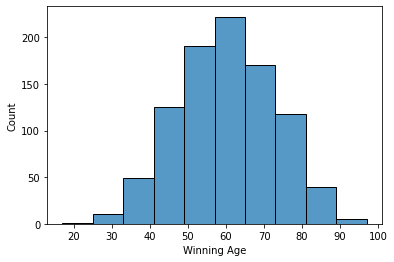

In [ ]:
ax = sns.histplot(
    data=df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    x='winning_age', 
    # bins=3, 
    bins=10,
    # bins=17,
)

ax.set(
    xlabel='Winning Age'
)

# plt.show(fig)
plt.show()
# plt.show(ax)

In [ ]:
# ---

In [ ]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

In [ ]:
# John Goodenough was 97 years old when he got the Nobel prize!!! Holy moly. 
# Interestingly John was born to American parents while they were in Germany. 
# This is one example where our analysis of countries counts an extra "German" 
# prize even though he is an American citizen. Too bad we don't have a 
# nationality column in our dataset! Nonetheless, this goes to show it is never 
# too late to win a Nobel prize. I'm keeping my fingers crossed for you!

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [ ]:
df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'].describe()

,winning_age
count,930.00
mean,59.96
std,12.63
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


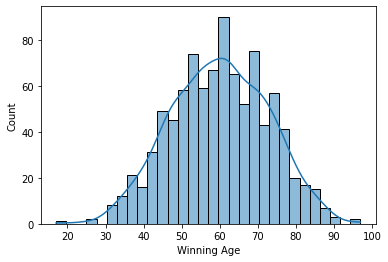

In [ ]:
ax = sns.histplot(
    data=df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    x='winning_age', 
    # bins=10, 
    # bins=20,
    bins=30,
    # bins=50,
    kde=True
)

ax.set(
    xlabel='Winning Age'
)

plt.show()

In [ ]:
# ---

In [ ]:
# Using .describe() is a fantastic way to get a feeling for how the numbers are 
# distributed in a particular column. However, actually visualising them on a 
# histogram to see their distribution is highly recommended too since it allows 
# us to see if we have a bell-shaped curve or something else.
# df_data['winning_age'].describe()
# df_data.winning_age.describe()
df_data[df_data['laureate_type'] == 'Individual']['winning_age'].describe()
# df_data.query('laureate_type == Individual').winning_age.describe()

count   930.00
mean     59.96
std      12.63
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

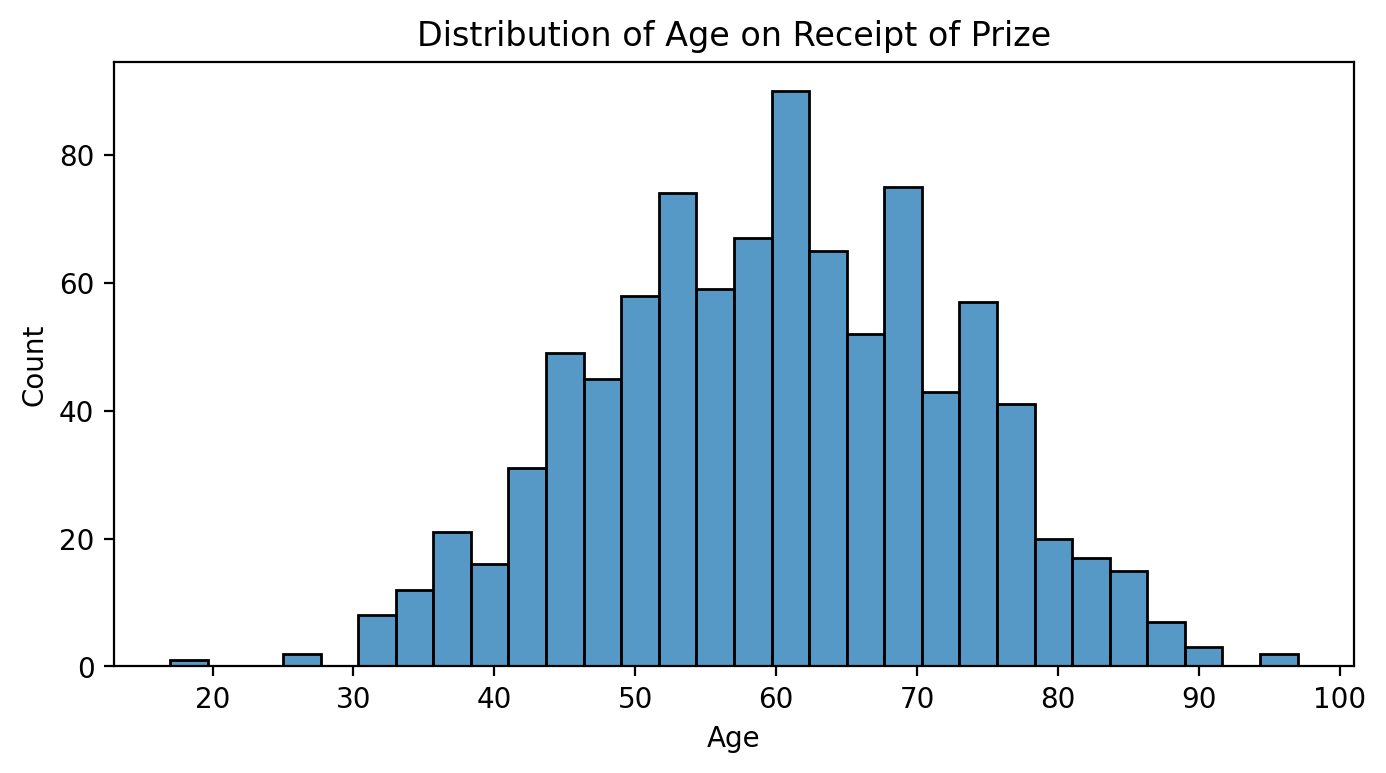

In [ ]:
# Here's what the histogram looks like:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
            #  x=df_data.winning_age,
             x=df_data[df_data['laureate_type'] == 'Individual']['winning_age'],
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


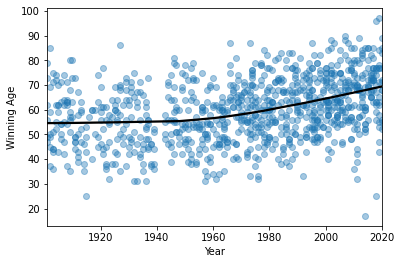

In [ ]:
# df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual']

ax = sns.regplot(
    # data=df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    data=df_data.sort_values('winning_age', ascending=False)[['full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    x='year',
    y='winning_age', 
    lowess=True,  # <--- learned something new 
    scatter_kws={'alpha': 0.4}, 
    line_kws={'color': 'black'}
)

ax.set(
    xlabel='Year', 
    ylabel='Winning Age'
)

plt.show()

In [ ]:
# According to the best fit line, how old were Nobel laureates in the years 1900
# -1940 when they were awarded the prize?
55

55

In [ ]:
# According to the best fit line, what age would it predict for a Nobel laureate 
# in 2020?
67

67

In [ ]:
# ---

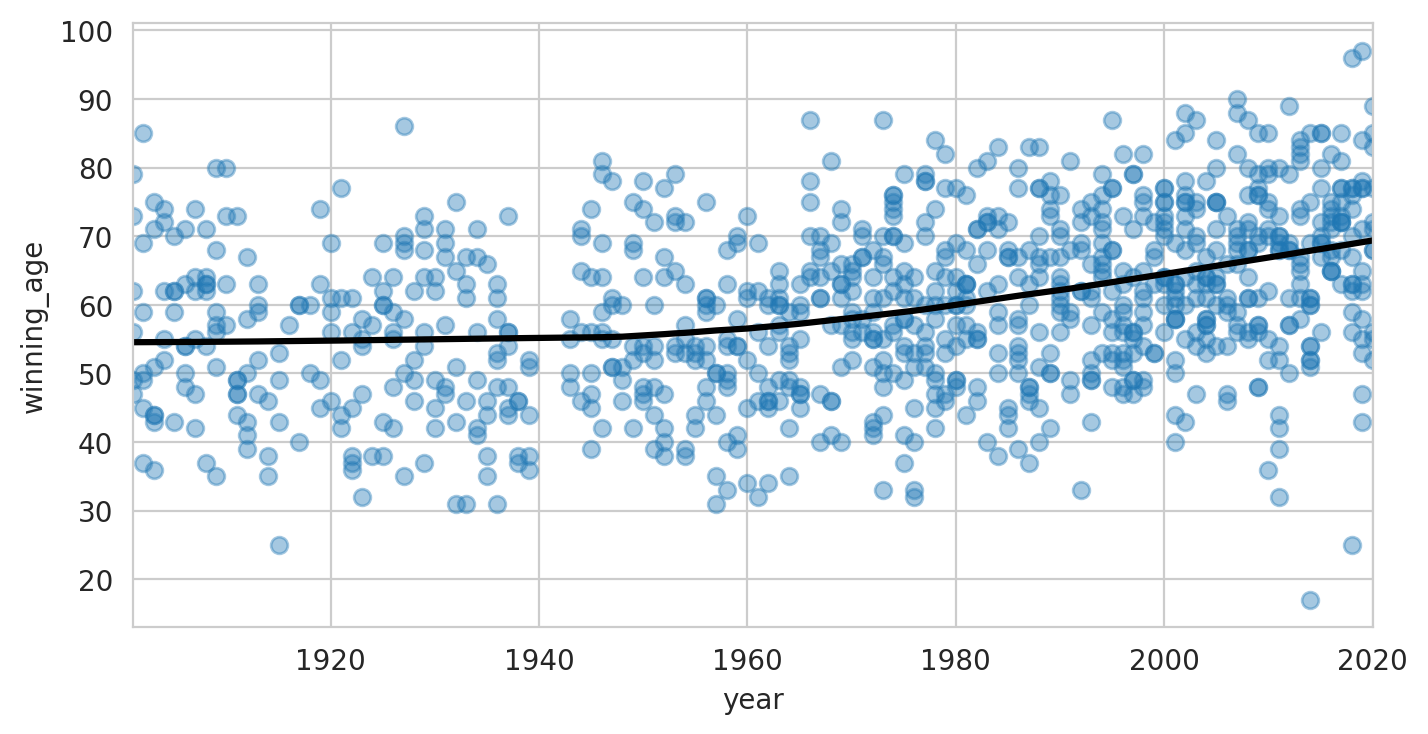

In [ ]:
# The histogram above shows us the distribution across the entire dataset, over 
# the entire time period. But perhaps the age has changed over time.
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(# data=df_data,
                data=df_data[df_data['laureate_type'] == 'Individual'],
                x='year',
                # # y='winning_age',
                # y=df_data[df_data['laureate_type'] == 'Individual']['winning_age'],
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

In [ ]:
# Using the lowess parameter allows us to plot a local linear regression. This 
# means the best fit line is still linear, but it's more like a moving average 
# which gives us a non-linear shape across the entire series. This is super neat 
# because it clearly shows how the Nobel laureates are getting their award later 
# and later in life. From 1900 to around 1950, the laureates were around 55 
# years old, but these days they are closer to 70 years old when they get their 
# award! The other thing that we see in the chart is that in the last 10 years 
# the spread has increased. We've had more very young and very old winners. In 
# 1950s/60s winners were between 30 and 80 years old. Lately, that range has 
# widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

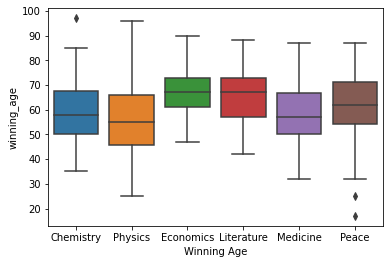

In [ ]:
# df_data.sort_values('winning_age', ascending=False)[['category', 'full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual']

ax = sns.boxplot(
    data=df_data.sort_values('winning_age', ascending=False)[['category', 'full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    x='category',
    y='winning_age'
)

ax.set(
    xlabel='Winning Age'
)

plt.show()

In [ ]:
# Which category has the longest "whiskers"?

# Physics

In [ ]:
# In which prize category are the average winners the oldest?

# Economics and Literature

In [ ]:
# In which prize category are the average winners the youngest?

# Physics and Medicine

In [ ]:
fig = px.box(
    df_data.sort_values('winning_age', ascending=False)[['category', 'full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    x='category', 
    y='winning_age'
)

fig.update_layout(
    xaxis_title='Winning Age', 
    yaxis_title='Category'
)

fig.show()

In [ ]:
# ---

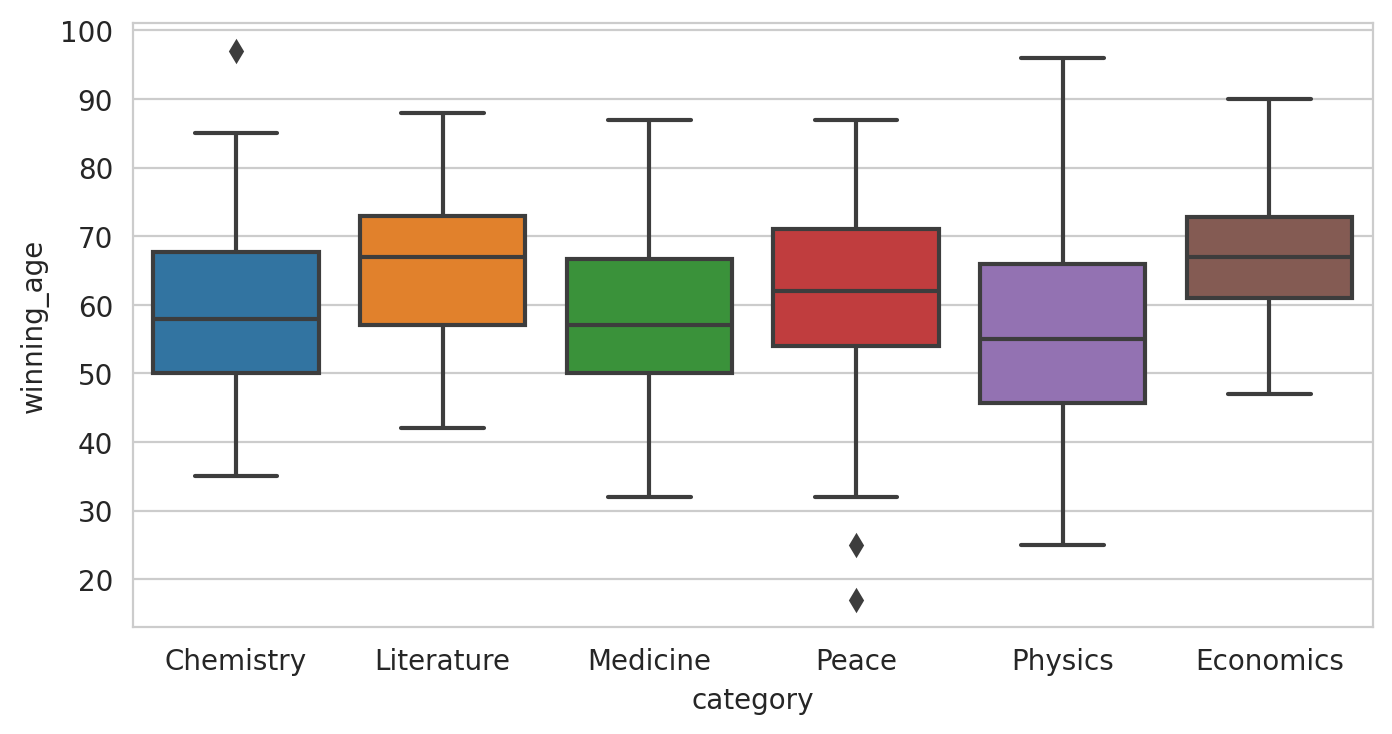

In [ ]:
# Seaborn allows us to create the above chart by category. But first, let's look 
# at a box plot by category.
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(# data=df_data,
                data=df_data[df_data['laureate_type'] == 'Individual'],
                x='category',
                y='winning_age')
 
plt.show()

In [ ]:
# The box plot shows us the mean, the quartiles, the maximum and the minimum 
# values. It raises an interesting question: "Are peace prize winners really 
# older than physics laureates?".

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


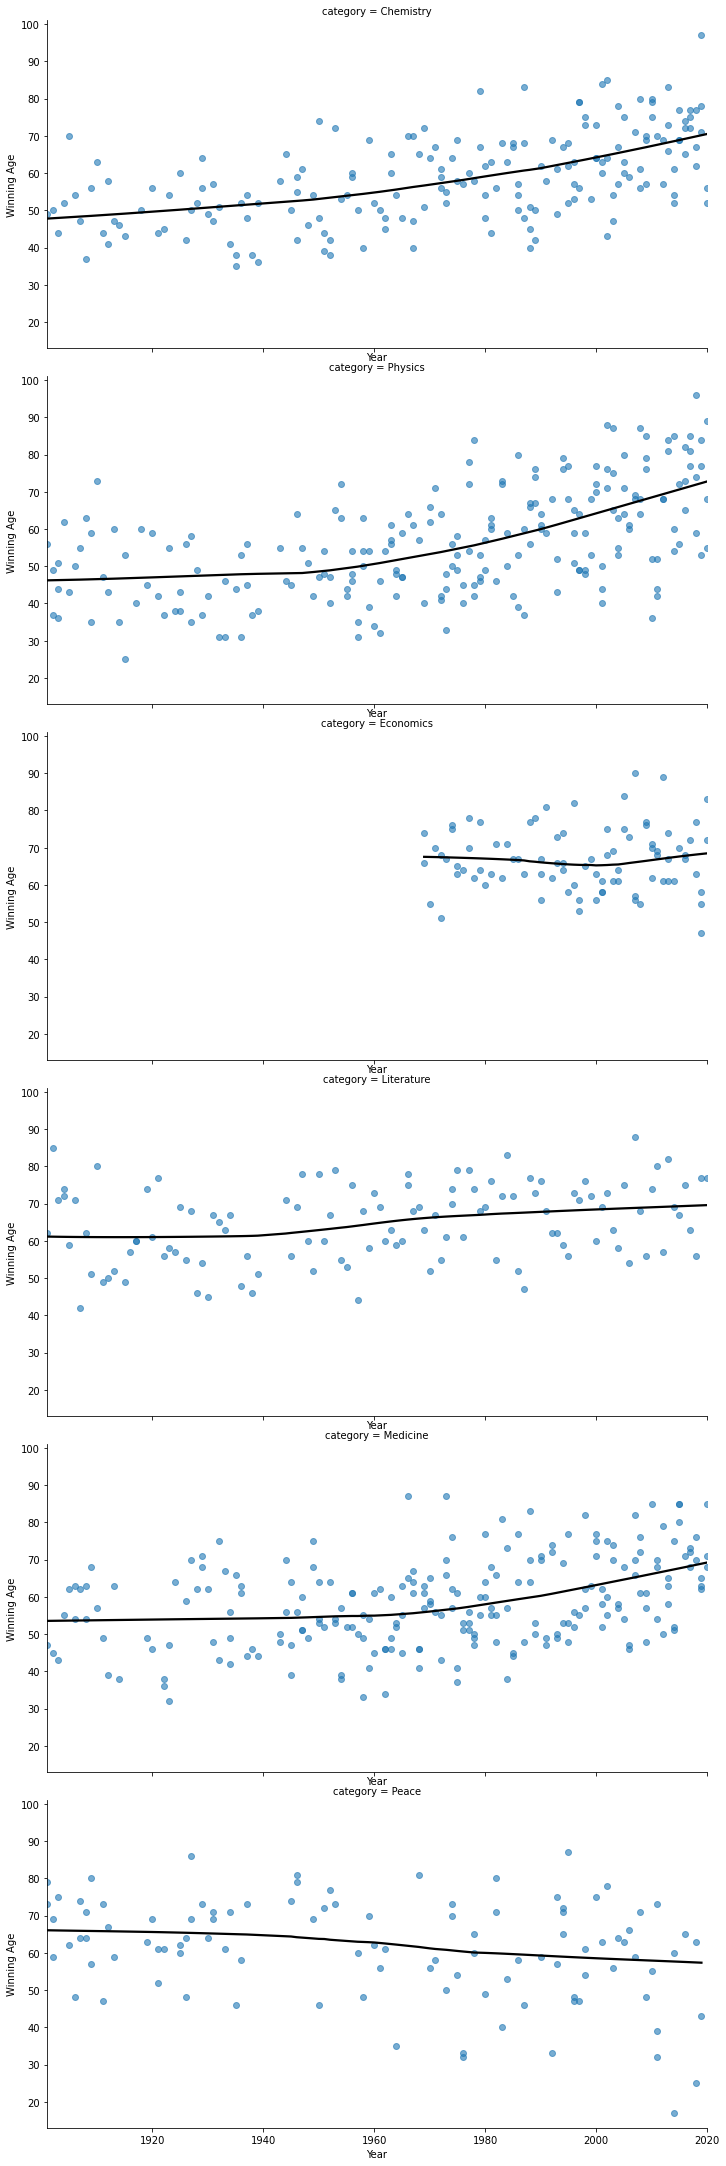

In [ ]:
ax = sns.lmplot(
    data=df_data.sort_values('winning_age', ascending=False)[['category', 'full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual'], 
    x='year',
    y='winning_age', 
    row='category',  # <--- learned something new
    lowess=True, 
    aspect=2,  # <--- learned something new
    scatter_kws = {'alpha': 0.6},  # <--- learned something new
    line_kws = {'color': 'black'}  # <--- learned something new
)

ax.set(
    xlabel='Year', 
    ylabel='Winning Age'
)

plt.show()

In [ ]:
# What are the winning age trends in each category?

# Chemistry = winning age increasing
# Physics = winning age increasing
# Economics = winning age ranging
# Literature = winning age is slightly increasing
# Medicine = winning age increasing
# Peace = winning age decreasing

In [ ]:
# Which category has the age trending up and which category has the age trending 
# down?

# Trending Up:
#   - Chemistry
#   - Physics
#   - Literature
#   - Medicine

# Trending Down:
#   - Year
#   - Peace

In [ ]:
# Is this .lmplot() telling a different story from the .boxplot()?

# Yes.

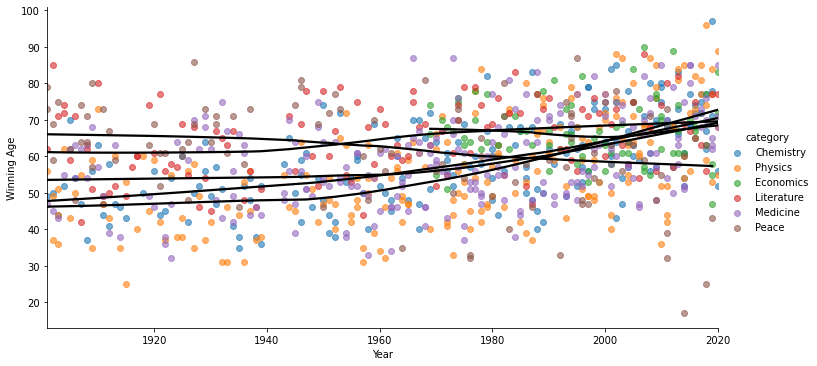

In [ ]:
laureates_winning_ages = df_data.sort_values('winning_age', ascending=False)[['category', 'full_name', 'winning_age', 'prize', 'year']][df_data.sort_values('winning_age', ascending=False)['laureate_type'] == 'Individual']

ax = sns.lmplot(
    data=laureates_winning_ages, 
    # x=laureates_winning_ages['year'],  # won't work here
    # x=laureates_winning_ages['year'].values,  # won't work here
    # x=laureates_winning_ages.year,  # won't work here
    # x=laureates_winning_ages.year.values,  # won't work here
    x='year', 
    # y=laureates_winning_ages['winning_age'],  # won't work here
    # y=laureates_winning_ages['winning_age'].values,  # won't work here
    # y=laureates_winning_ages.winning_age,  # won't work here
    # y=laureates_winning_ages.winning_age.values,  # won't work here
    y='winning_age', 
    # row='category', 
    # hue=laureates_winning_ages['category'],  # won't work here
    # hue=laureates_winning_ages['category'].values,  # won't work here
    # hue=laureates_winning_ages.category,  # won't work here
    # hue=laureates_winning_ages.category.values,  # won't work here
    hue='category', 
    lowess=True, 
    aspect=2,  # <--- learned something new
    scatter_kws = {'alpha': 0.6},  # <--- learned something new
    line_kws = {'color': 'black'}  # <--- learned something new
)

ax.set(
    xlabel='Year', 
    ylabel='Winning Age'
)

plt.show()

In [ ]:
# ---

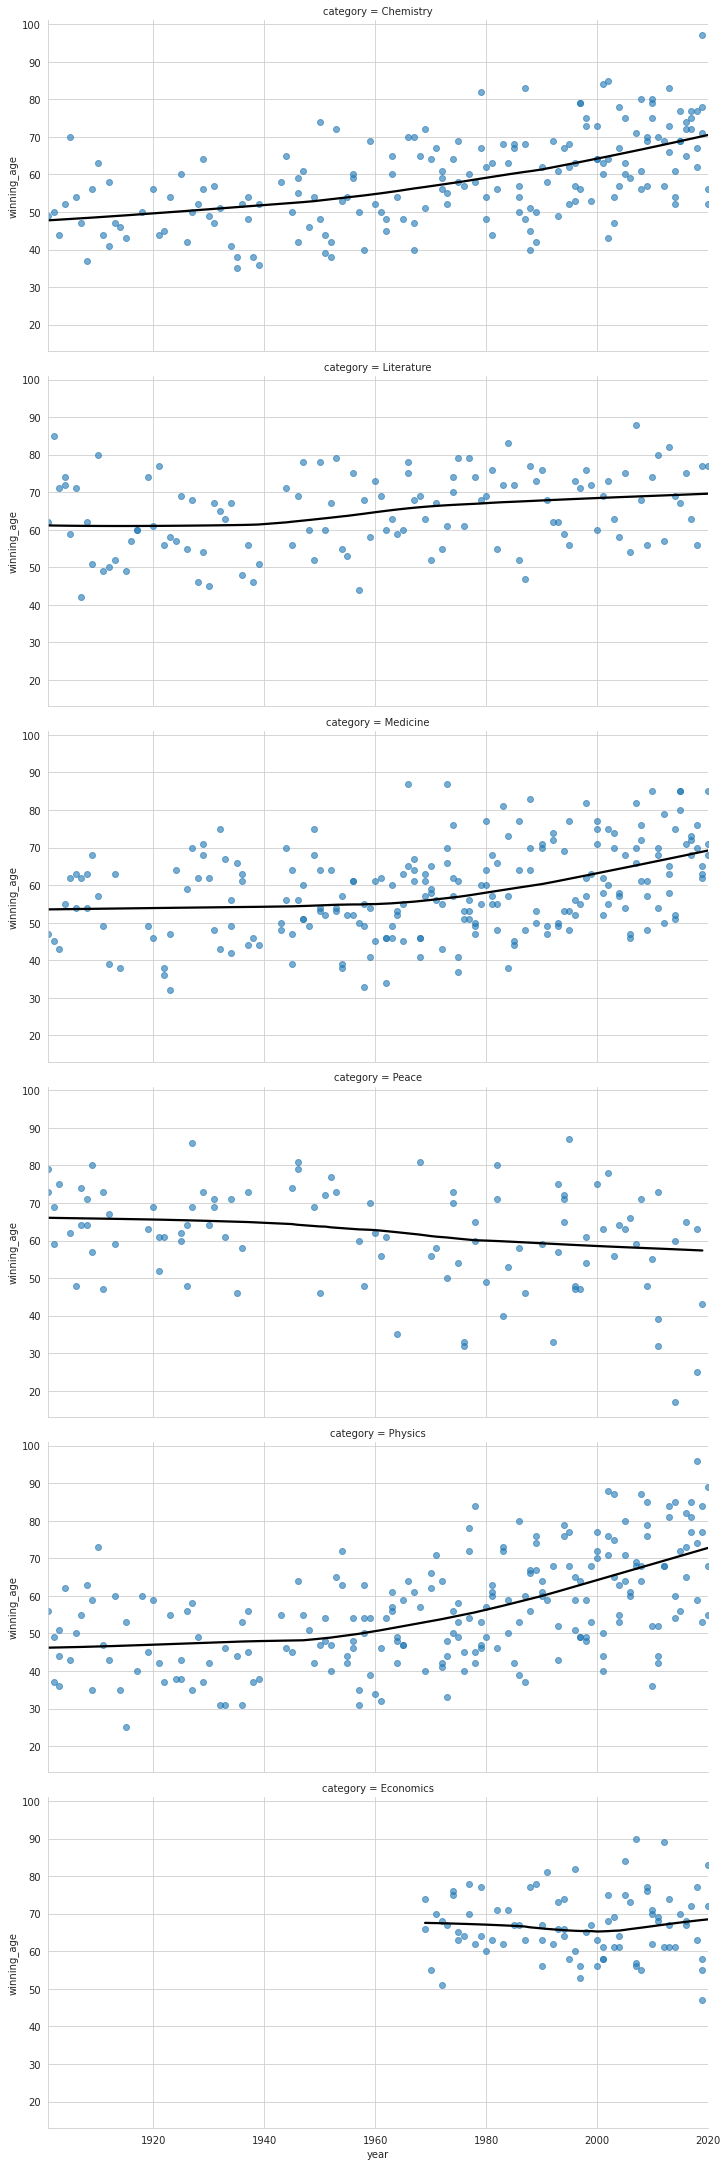

In [ ]:
# To get a more complete picture, we should look at how the age of winners has 
# changed over time. The box plot above looked at the dataset as a whole.
with sns.axes_style('whitegrid'):
    sns.lmplot(# data=df_data,
               data=df_data[df_data['laureate_type'] == 'Individual'],
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

In [ ]:
# We see that winners in physics, chemistry, and medicine have gotten older over 
# time. The ageing trend is strongest for physics. The average age used to be 
# below 50, but now it's over 70. Economics, the newest category, is much more 
# stable in comparison. The peace prize shows the opposite trend where winners 
# are getting younger! As such, our scatter plots showing the best fit lines 
# over time and our box plot of the entire dataset can tell very different 
# stories!

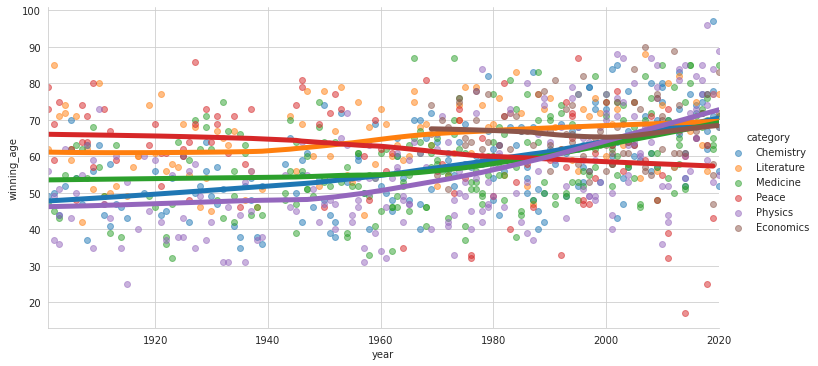

In [ ]:
# To combine all these charts into the same chart, we can use the hue parameter
with sns.axes_style("whitegrid"):
    sns.lmplot(# data=df_data,
               data=df_data[df_data['laureate_type'] == 'Individual'],
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()